# 一、导入库文件

In [1]:
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import mean
from numpy import cov
from PIL import Image
from matplotlib.pyplot import *
import os
import  random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import itertools
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 二、导入数据

In [2]:
data_dir = pathlib.Path("./man_woman")
image_count1 = len(list(data_dir.glob("*/*.jpg")))
print(image_count1)

1000


# 三、数据预处理

In [3]:
validation_rate = 0.2
batch_size = 128
img_height = 256
img_width = 256

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=validation_rate,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 800 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=validation_rate,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 200 files for validation.


### 3. 1 检查数据维度是否正确

In [78]:
train_labels =  np.array([])
i=1
for x, y in train_ds:
    if i==1:
        train_data =  x
    else:
        train_data = np.concatenate([train_data, x])
    i = i + 1
    train_labels = np.concatenate([train_labels, y.numpy()])
print(train_data.shape)    
print(train_labels.shape)

(800, 256, 256, 3)
(800,)


In [93]:
test_labels =  np.array([])
i=1
for x, y in val_ds:
    if i==1:
        test_data =  x
    else:
        test_data = np.concatenate([test_data, x.numpy()])
    i = i + 1
    test_labels = np.concatenate([test_labels, y.numpy()])
print(test_data.shape)    
print(test_labels.shape)

(200, 256, 256, 3)
(200,)


### 3.2 数据归一化

In [100]:
train_data_scale = train_data / 255.
test_data_scale = test_data / 255.

In [8]:
class_names = train_ds.class_names
print(class_names)

['man', 'woman']


In [9]:
val_class_names = val_ds.class_names
print(val_class_names)

['man', 'woman']


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


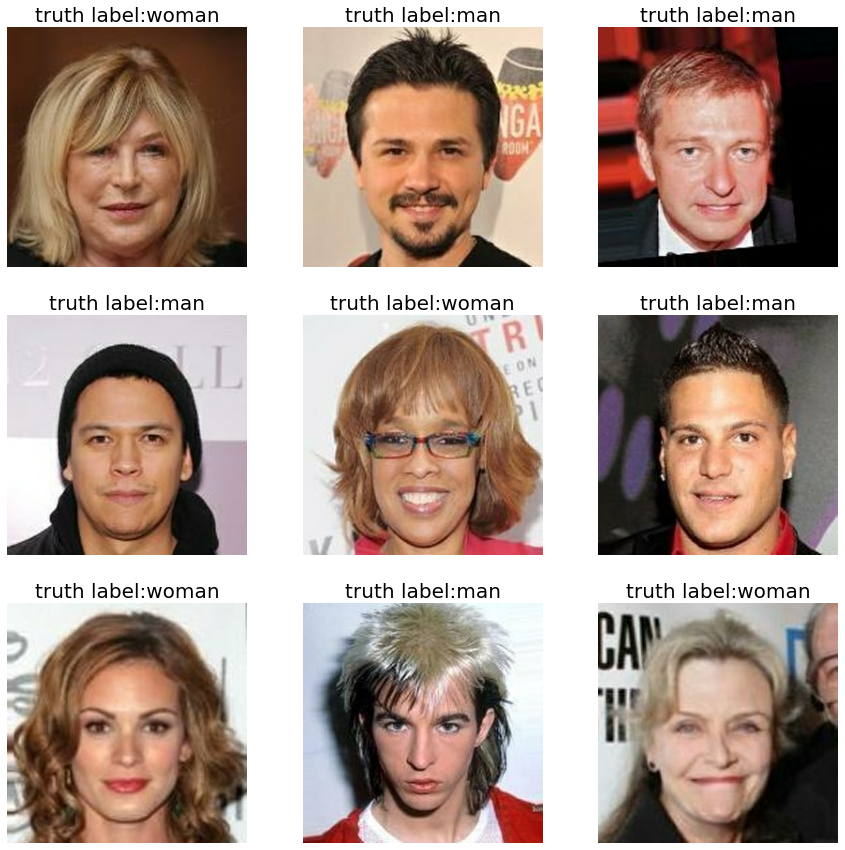

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('truth label:{}'.format(class_names[labels[i]]),fontsize=20)
        plt.axis("off")

# 四、人脸性别分类实验

## 4.1 决策树

### 4.1.1 分裂节点使用gini方式

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
from sklearn.tree import DecisionTreeClassifier
train_data_scale_dtc = train_data_scale.reshape(800, -1)
test_data_scale_dtc = test_data_scale.reshape(200, -1)
# print(train_data_scale.shape, train_data_scale_dtc.shape)
# print(test_data_scale.shape, test_data_scale_dtc.shape)
# print(train_labels.shape, test_labels.shape)
dtc_gini = DecisionTreeClassifier(criterion = 'gini')
dtc_gini.fit(train_data_scale_dtc, train_labels)
y_pred_gini = dtc_gini.predict(test_data_scale_dtc)

In [218]:
dtc_gini_score = dtc_gini.score(test_data_scale_dtc, test_labels)

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72       113
         1.0       0.64      0.71      0.67        87

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



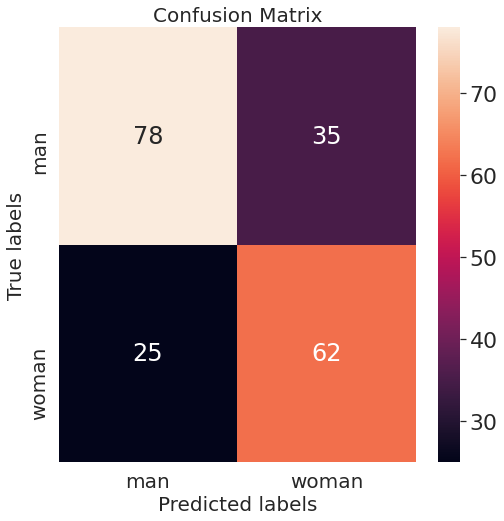

In [213]:
conf_matrix_gini = confusion_matrix(test_labels, y_pred_gini)
plt.figure(figsize=(8,8))
ax=plt.subplot()
sns.set(font_scale=2)
sns.heatmap(conf_matrix_gini, annot=True)
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['man', 'woman'], fontsize=20)
ax.yaxis.set_ticklabels(['man', 'woman'] , fontsize=20)
print(classification_report(test_labels,y_pred_gini))

In [190]:
test_data_scale_gini = test_data_scale.reshape(200, -1)
y_pred_gini = dtc_gini.predict(test_data_scale_gini)
y_pred_gini.shape
print('\n序号 \t 实际标签   预测标签')
print('----\t-----\t  -------')
for i in range(1, 201):
    print(i, '\t', class_names[int(test_labels[i - 1])], '\t  ', class_names[int(y_pred_gini[i - 1])])


序号 	 实际标签   预测标签
----	-----	  -------
1 	 woman 	   woman
2 	 woman 	   woman
3 	 man 	   man
4 	 man 	   man
5 	 man 	   man
6 	 man 	   man
7 	 woman 	   man
8 	 man 	   man
9 	 woman 	   woman
10 	 man 	   man
11 	 man 	   man
12 	 man 	   man
13 	 woman 	   woman
14 	 woman 	   woman
15 	 man 	   man
16 	 man 	   woman
17 	 woman 	   woman
18 	 man 	   woman
19 	 woman 	   woman
20 	 man 	   man
21 	 man 	   woman
22 	 man 	   man
23 	 woman 	   woman
24 	 man 	   man
25 	 woman 	   woman
26 	 woman 	   woman
27 	 man 	   man
28 	 man 	   man
29 	 man 	   man
30 	 man 	   man
31 	 woman 	   woman
32 	 man 	   man
33 	 woman 	   woman
34 	 man 	   woman
35 	 woman 	   woman
36 	 woman 	   woman
37 	 man 	   man
38 	 man 	   woman
39 	 man 	   man
40 	 man 	   man
41 	 woman 	   woman
42 	 man 	   woman
43 	 woman 	   man
44 	 woman 	   woman
45 	 woman 	   woman
46 	 man 	   man
47 	 woman 	   woman
48 	 man 	   woman
49 	 man 	   woman
50 	 woman 	   man
51 	 man 	   man
52 	 man 

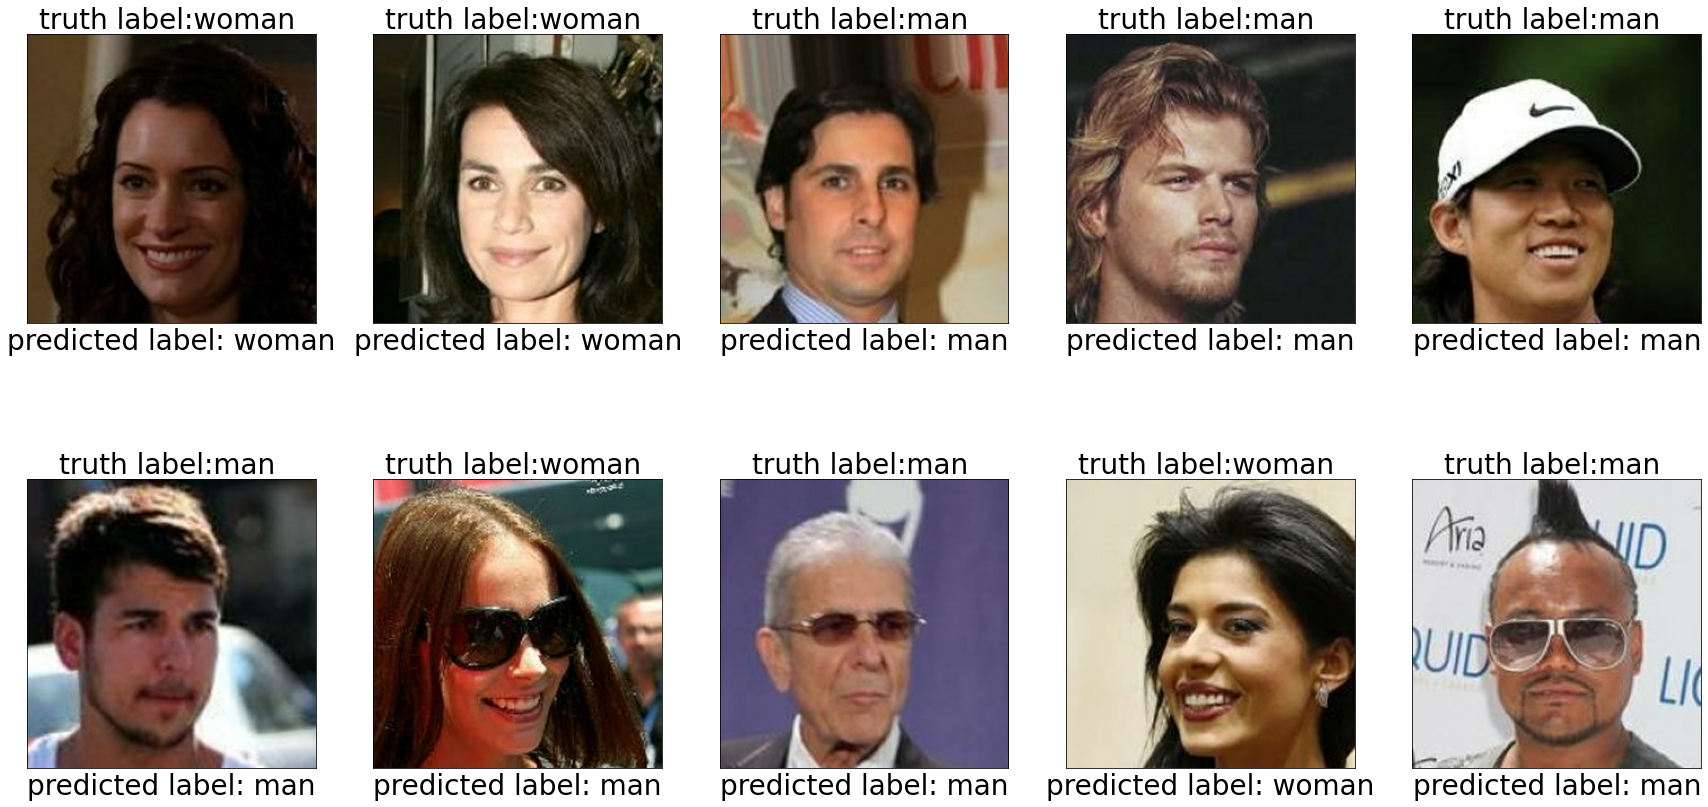

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))
for images, labels in val_ds.take(1):
    temp = 1
    for i in range(10):  
        ax = plt.subplot(2, 5, temp)
        temp_scale = images[i].numpy().astype("uint8") / 255.
        temp_scale_flatten = temp_scale.flatten().reshape(1, -1)
        y_pred_temp = dtc_gini.predict(temp_scale_flatten)
        plt.title('truth label:{} '.format(class_names[labels[i]]) ,fontsize=28)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('predicted label: {}'.format(class_names[int(y_pred_temp)]) ,fontsize=28)
        plt.imshow(images[i].numpy().astype("uint8"))
        temp = temp + 1

### 4.1.2 分裂节点使用entropy方式

In [ ]:
dtc_entropy = DecisionTreeClassifier(criterion = 'entropy')
dtc_entropy.fit(train_data_scale_dtc, train_labels)
y_pred_entropy = dtc_entropy.predict(test_data_scale_dtc)

In [219]:
dtc_entropy_score = dtc_entropy.score(test_data_scale_dtc, test_labels)

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       113
         1.0       0.74      0.75      0.74        87

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200



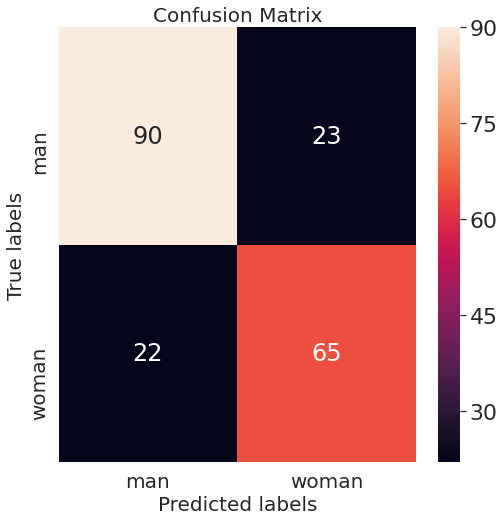

In [212]:
conf_matrix_entropy = confusion_matrix(test_labels, y_pred_entropy)
plt.figure(figsize=(8,8))
ax=plt.subplot()
sns.set(font_scale=2)
sns.heatmap(conf_matrix_entropy, annot=True)
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['man', 'woman'], fontsize=20)
ax.yaxis.set_ticklabels(['man', 'woman'] , fontsize=20)
print(classification_report(test_labels,y_pred_entropy))

## 4.2 CNN提取特征 + 决策树分类(2048个特征)
### 4.2.1 CNN模型搭建

In [11]:
test_sample = batch_size

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
num_classes = 2
model = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Resizing(height=256, width=256, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(2048, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        1

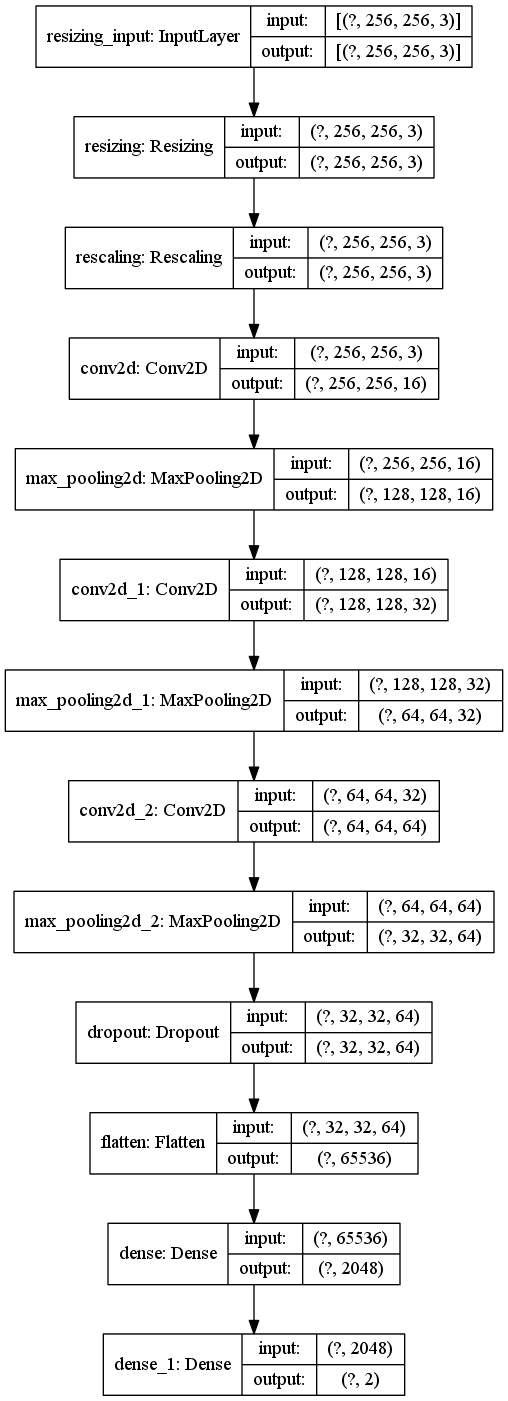

In [17]:
tf.keras.utils.plot_model(model, to_file='CNN_Architecture.png', show_shapes=True, show_layer_names=True)

### 4.2.2 CNN模型训练

In [18]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_accuracy'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure(figsize=(4, 4), dpi=100)
        
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right") 
        plt.show()

Epoch 1/20
7/7 [==============================] - 2s 288ms/step - loss: 5.3775 - accuracy: 0.5275 - val_loss: 0.7202 - val_accuracy: 0.5650
Epoch 2/20
7/7 [==============================] - 1s 96ms/step - loss: 0.7336 - accuracy: 0.5000 - val_loss: 0.6653 - val_accuracy: 0.6900
Epoch 3/20
7/7 [==============================] - 1s 95ms/step - loss: 0.6475 - accuracy: 0.6150 - val_loss: 0.6491 - val_accuracy: 0.6100
Epoch 4/20
7/7 [==============================] - 1s 108ms/step - loss: 0.5787 - accuracy: 0.6850 - val_loss: 0.5357 - val_accuracy: 0.7150
Epoch 5/20
7/7 [==============================] - 1s 100ms/step - loss: 0.5251 - accuracy: 0.7325 - val_loss: 0.4662 - val_accuracy: 0.7900
Epoch 6/20
7/7 [==============================] - 1s 114ms/step - loss: 0.4180 - accuracy: 0.8188 - val_loss: 0.4703 - val_accuracy: 0.8000
Epoch 7/20
7/7 [==============================] - 1s 101ms/step - loss: 0.3655 - accuracy: 0.8275 - val_loss: 0.3733 - val_accuracy: 0.8450
Epoch 8/20
7/7 [======

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


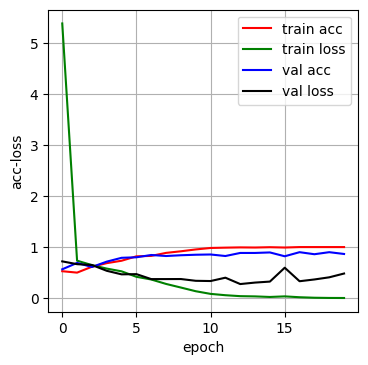

In [19]:
history = LossHistory()
earlyStopCb = EarlyStopping(monitor='val_accuracy', restore_best_weights=False, patience=10)
cnn_history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks=[history, earlyStopCb])
history.loss_plot('epoch')

### 4.2.3 CNN提取到的特征可视化

(1, 256, 256, 3)
resizing_input (1, 256, 256, 3) 
resizing (1, 256, 256, 3) 
rescaling (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_1 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_2 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
dropout (1, 32, 32, 64) 
flatten (1, 65536) 
dense (1, 2048) 
dense_1 (1, 2) 
resizing_input (1, 256, 256, 3) 


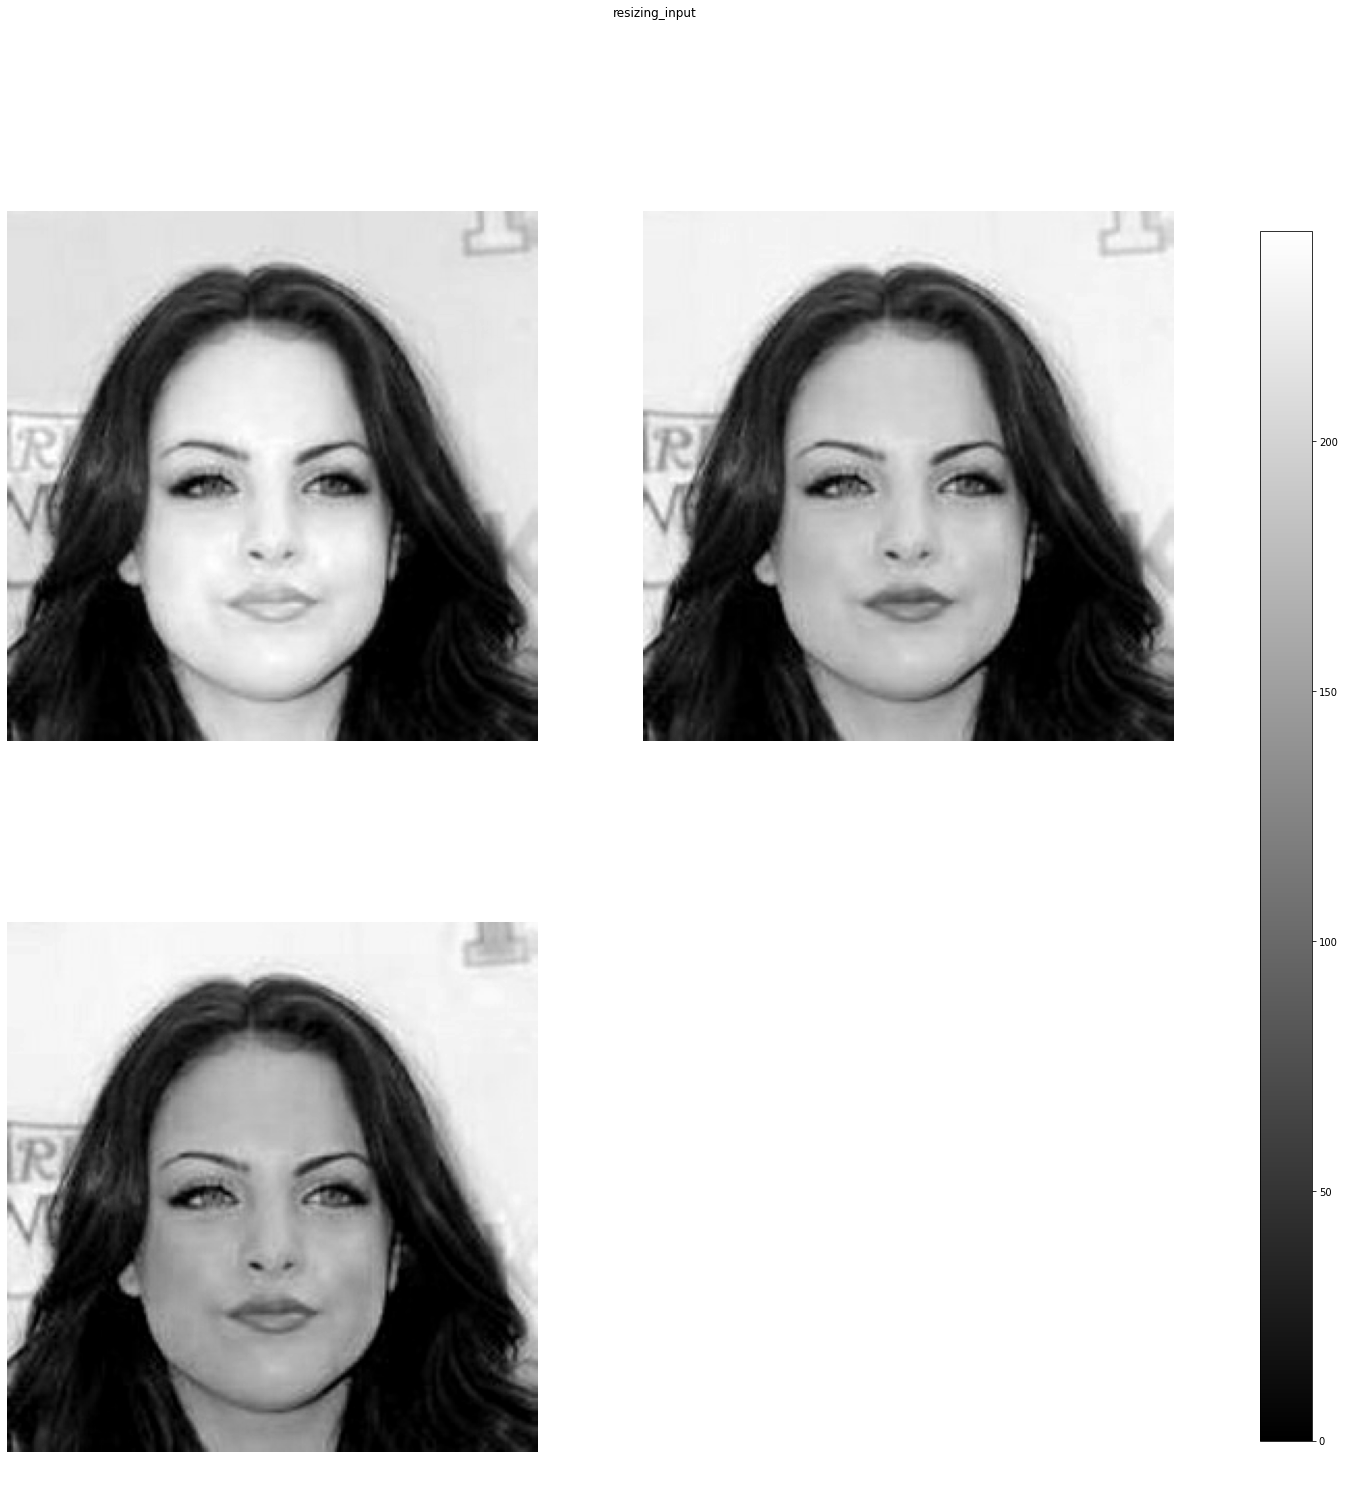

resizing (1, 256, 256, 3) 


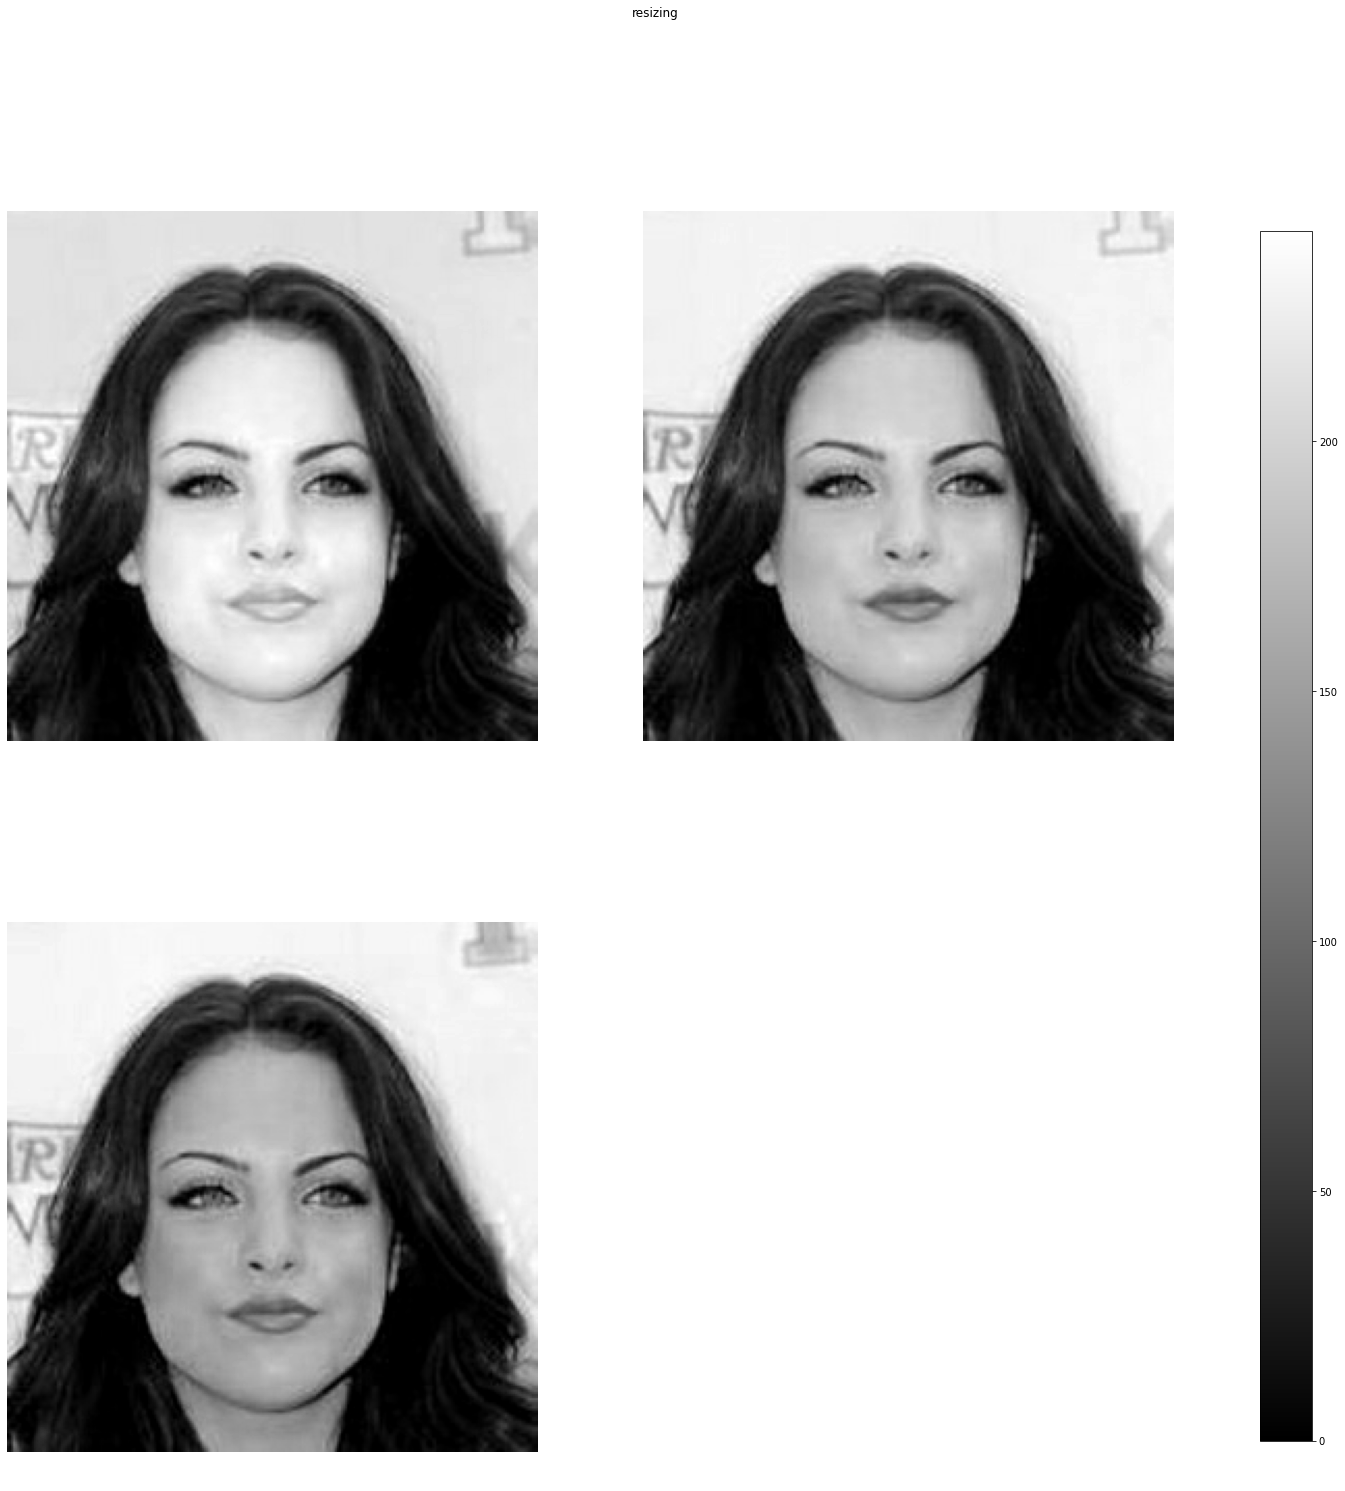

rescaling (1, 256, 256, 3) 


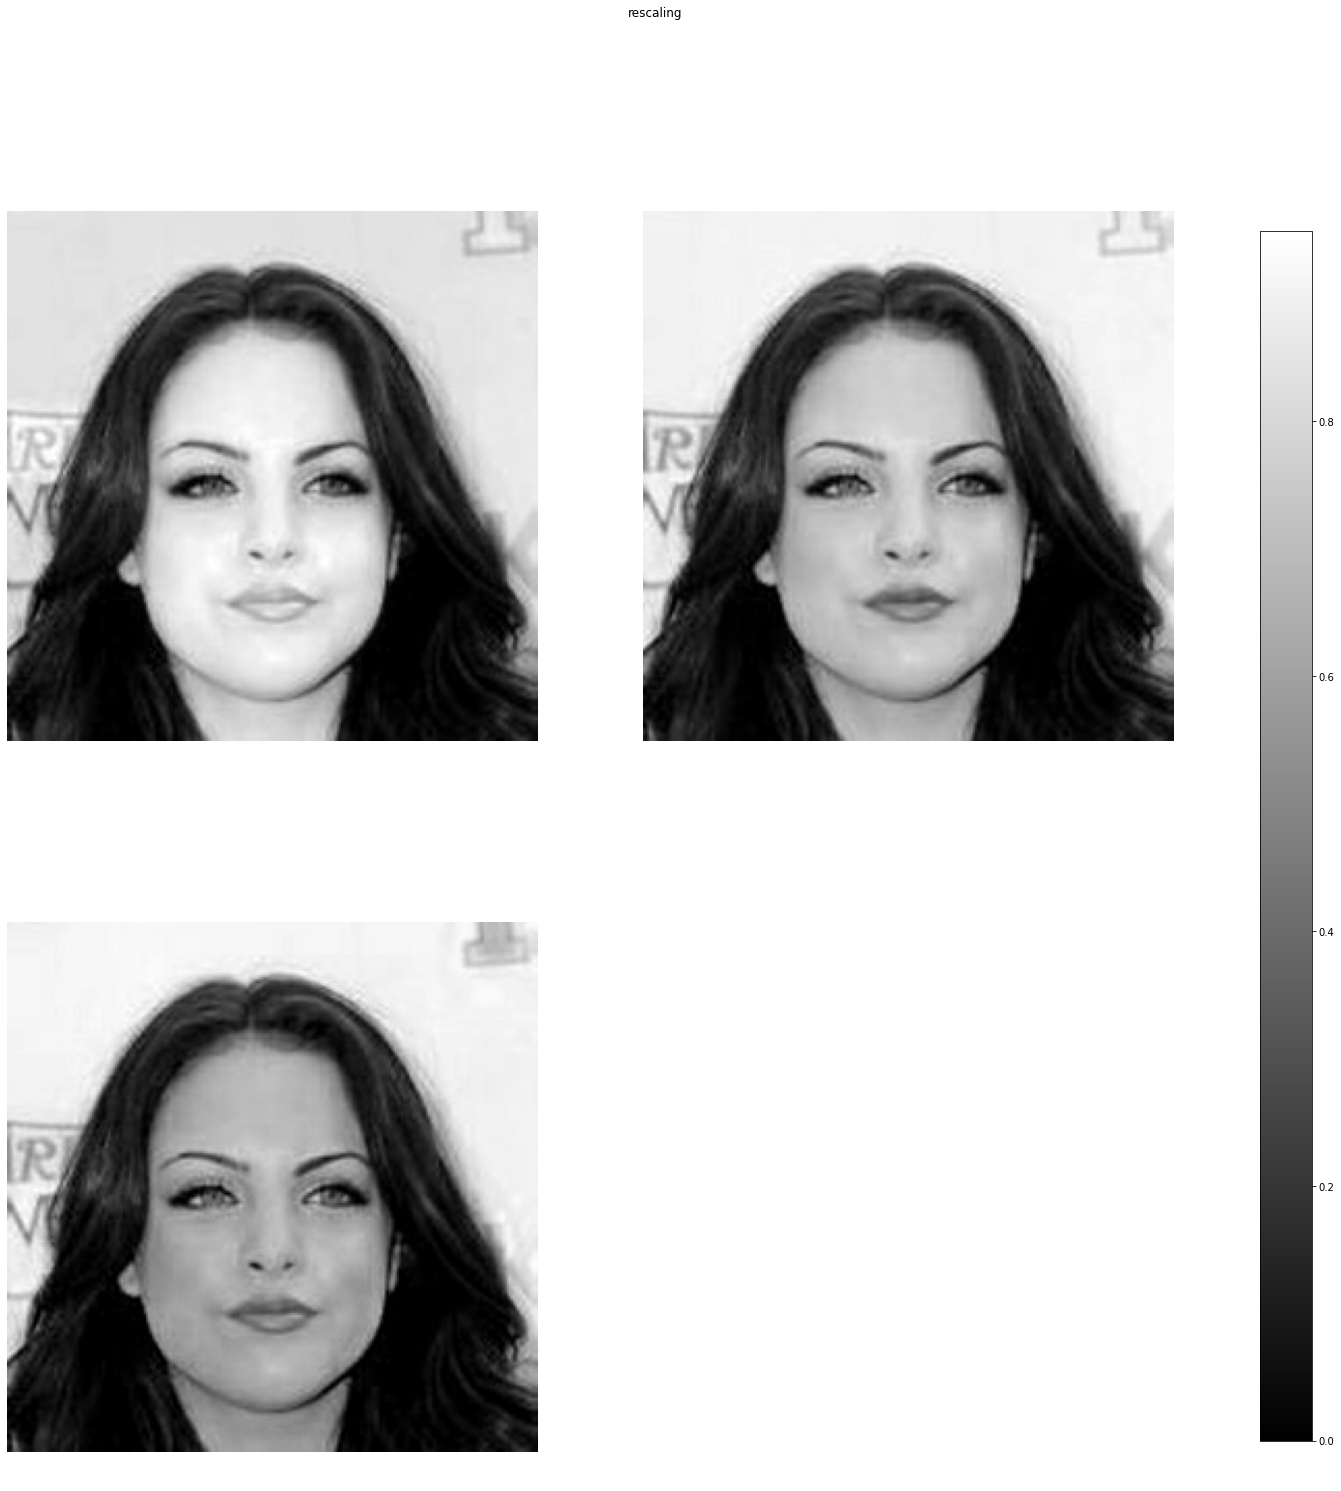

conv2d (1, 256, 256, 16) 


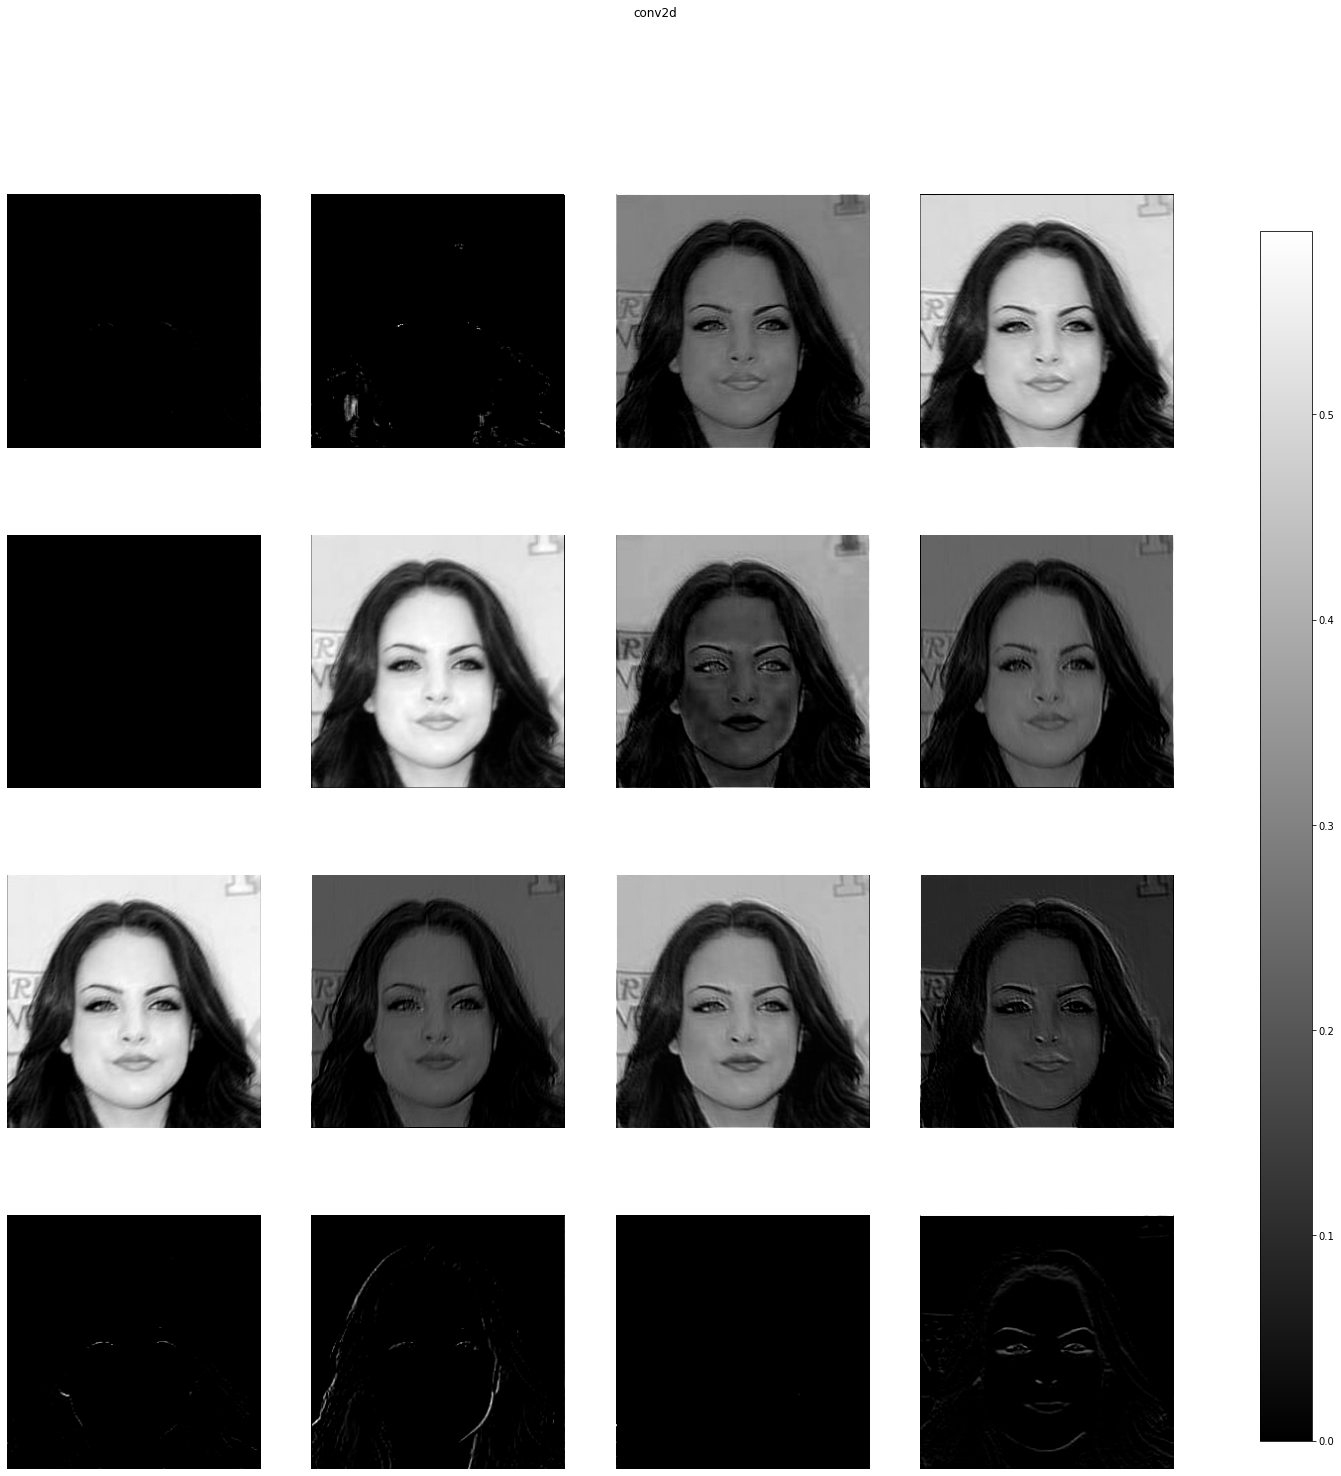

max_pooling2d (1, 128, 128, 16) 


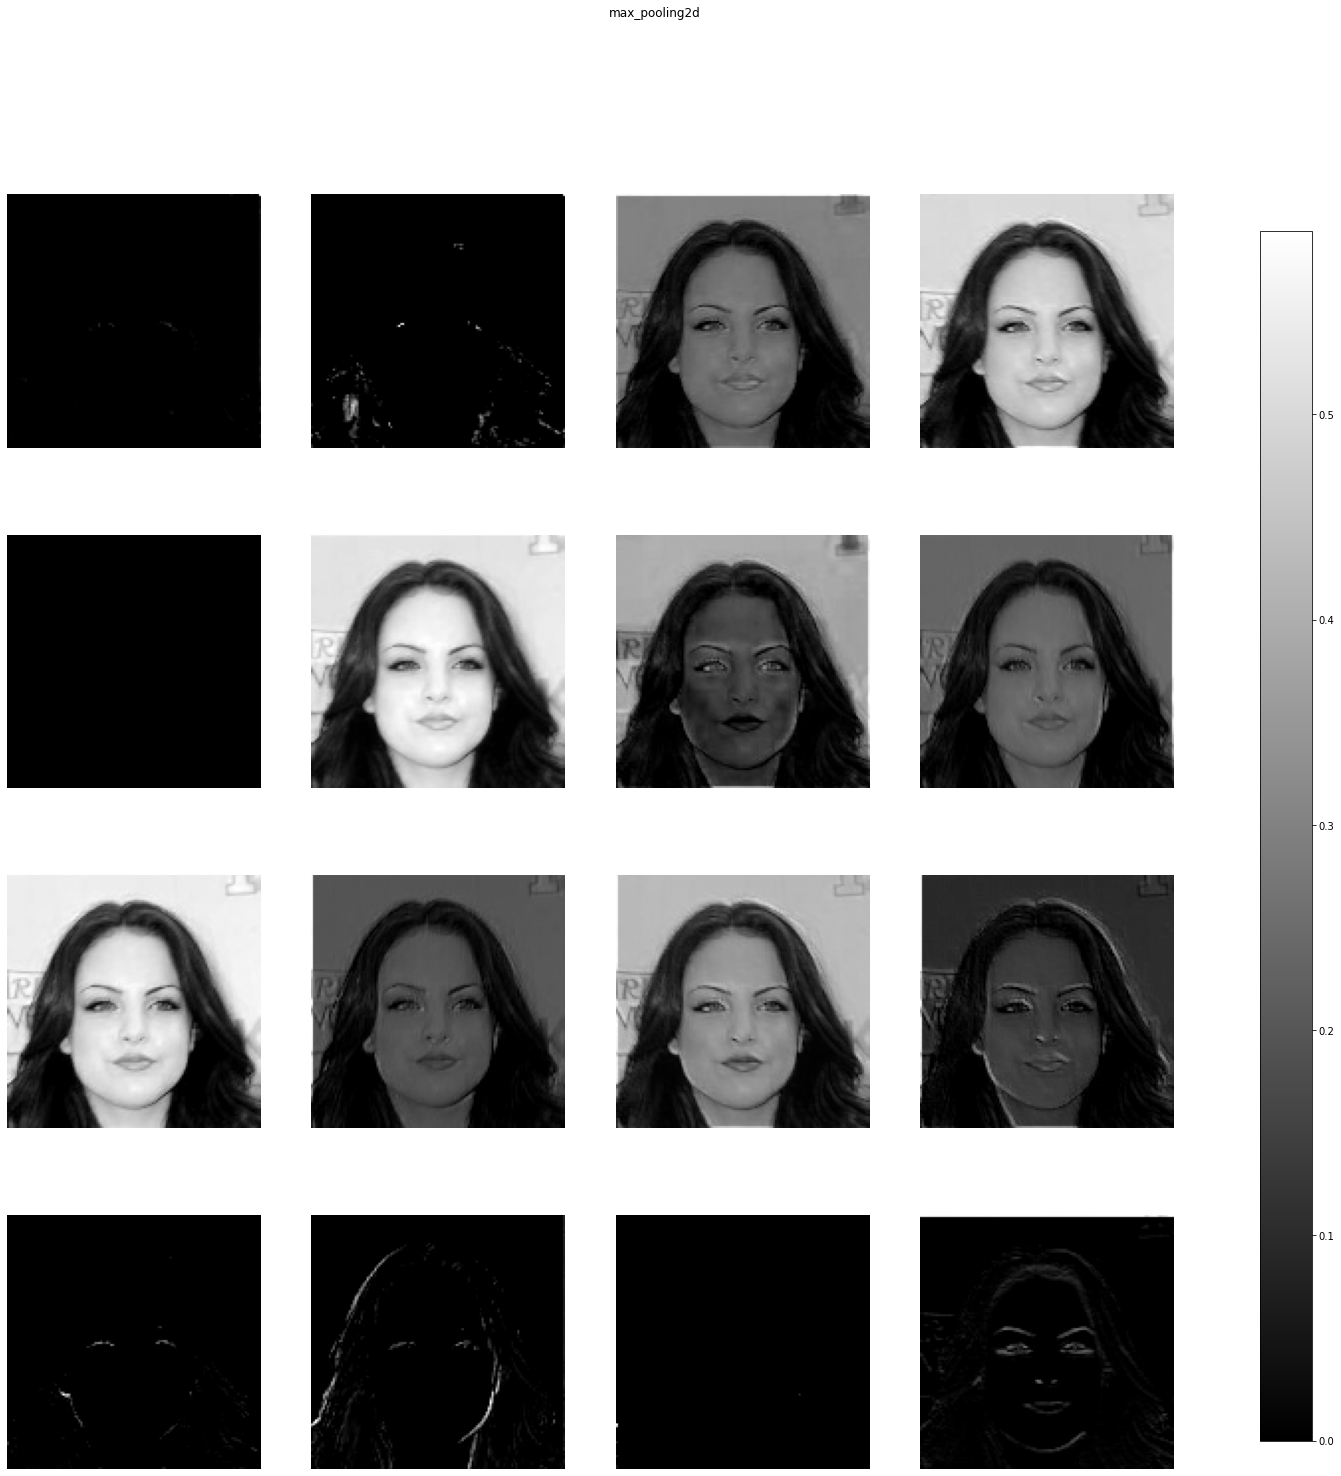

conv2d_1 (1, 128, 128, 32) 


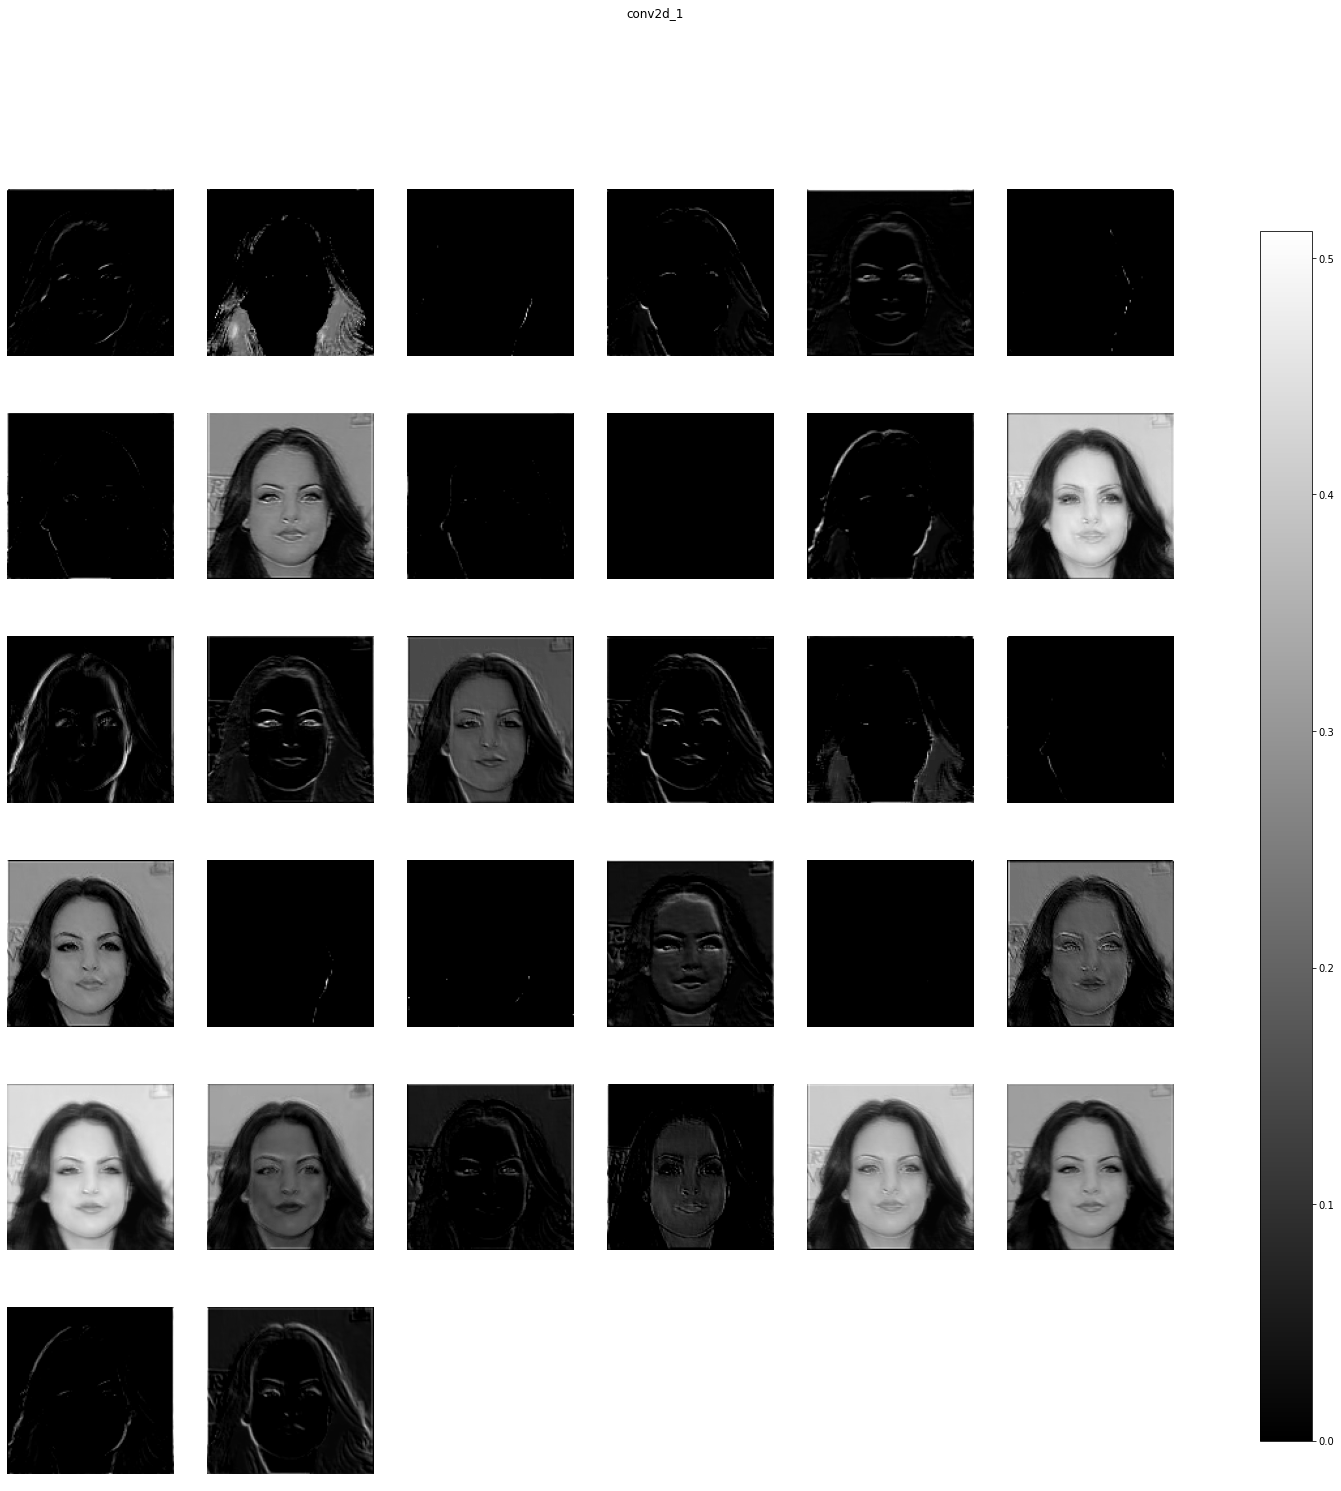

max_pooling2d_1 (1, 64, 64, 32) 


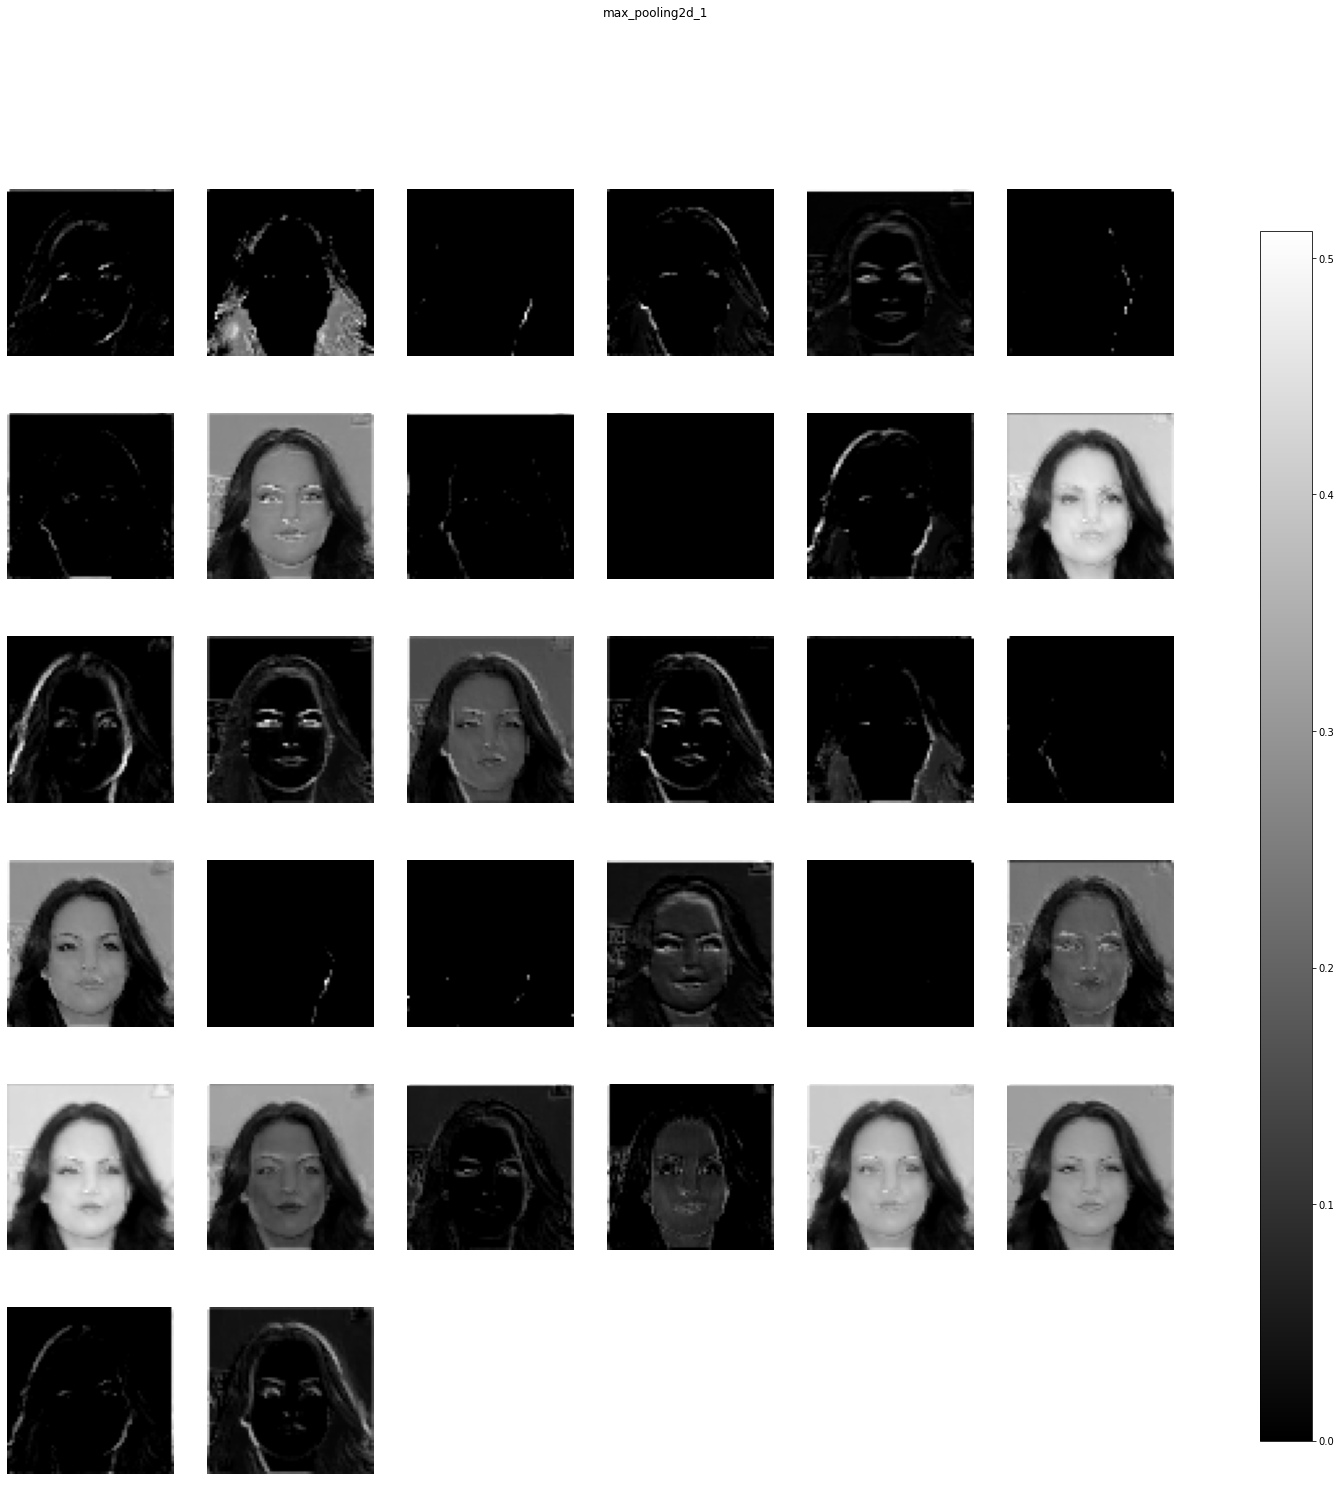

conv2d_2 (1, 64, 64, 64) 


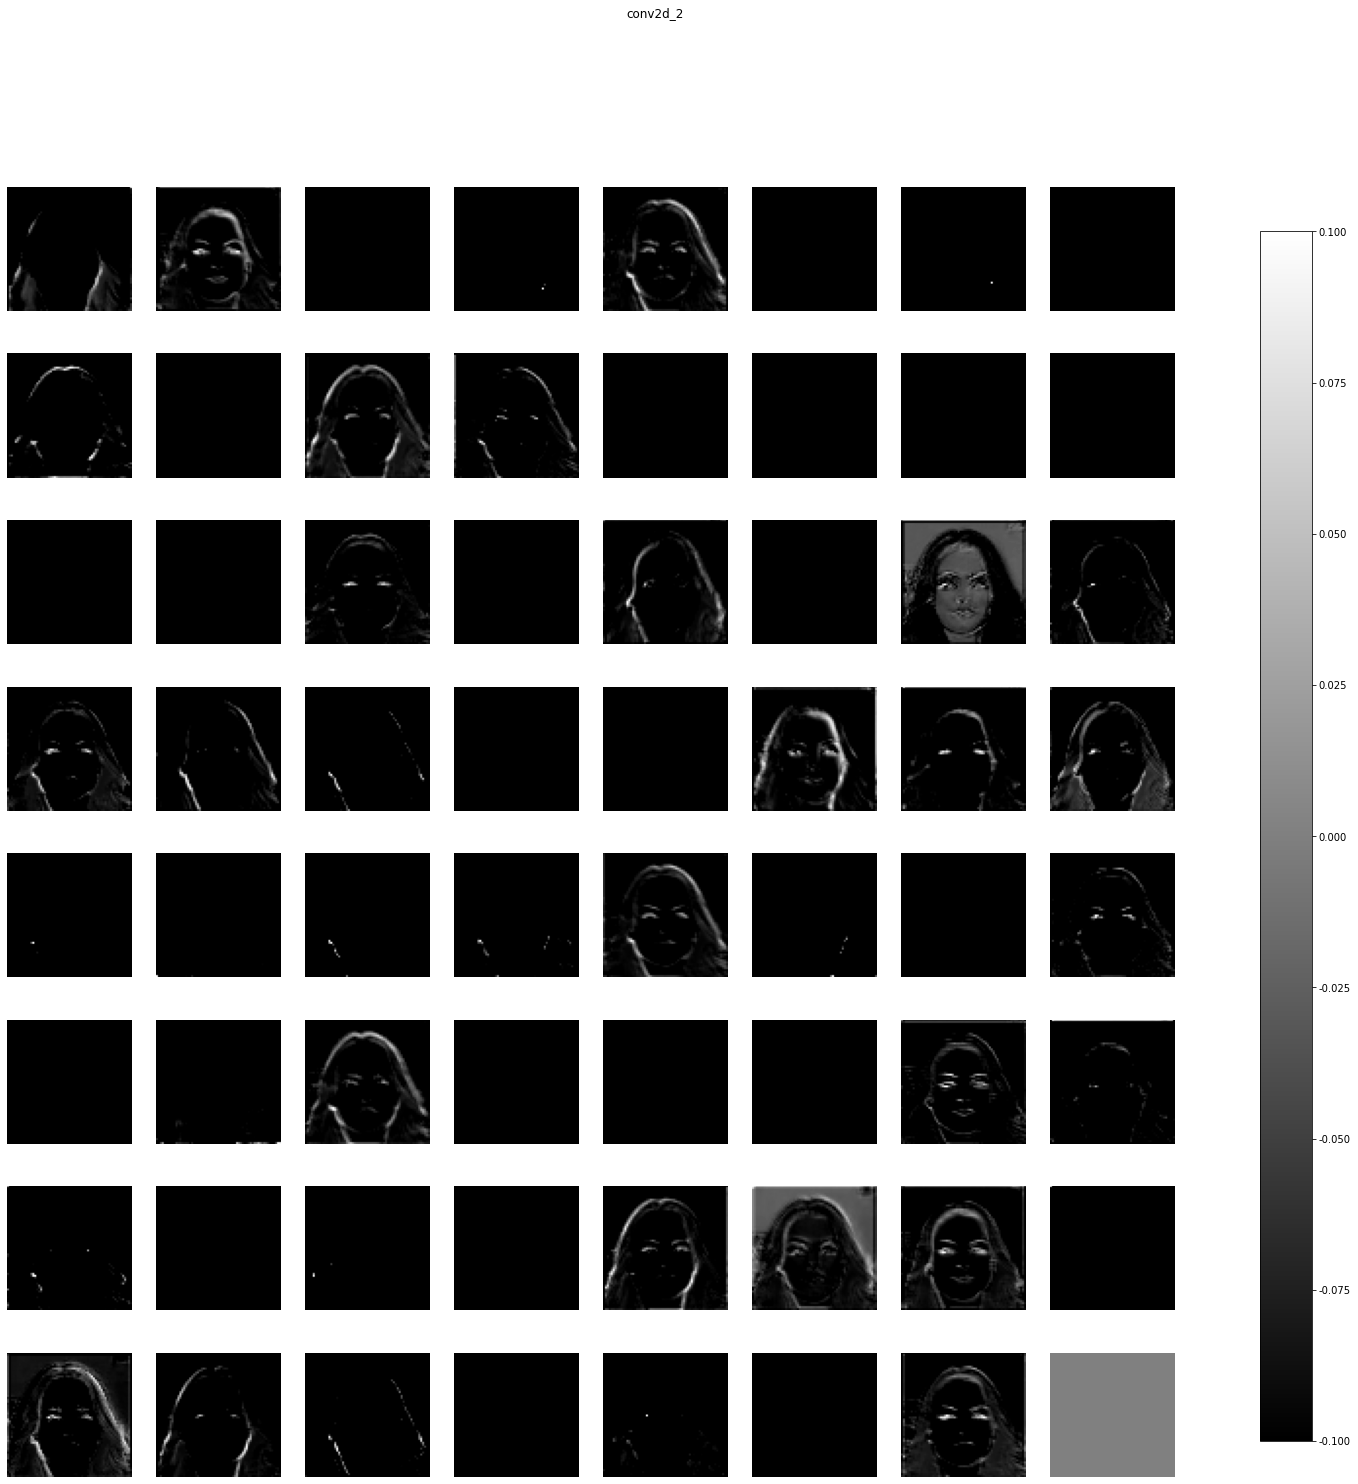

max_pooling2d_2 (1, 32, 32, 64) 


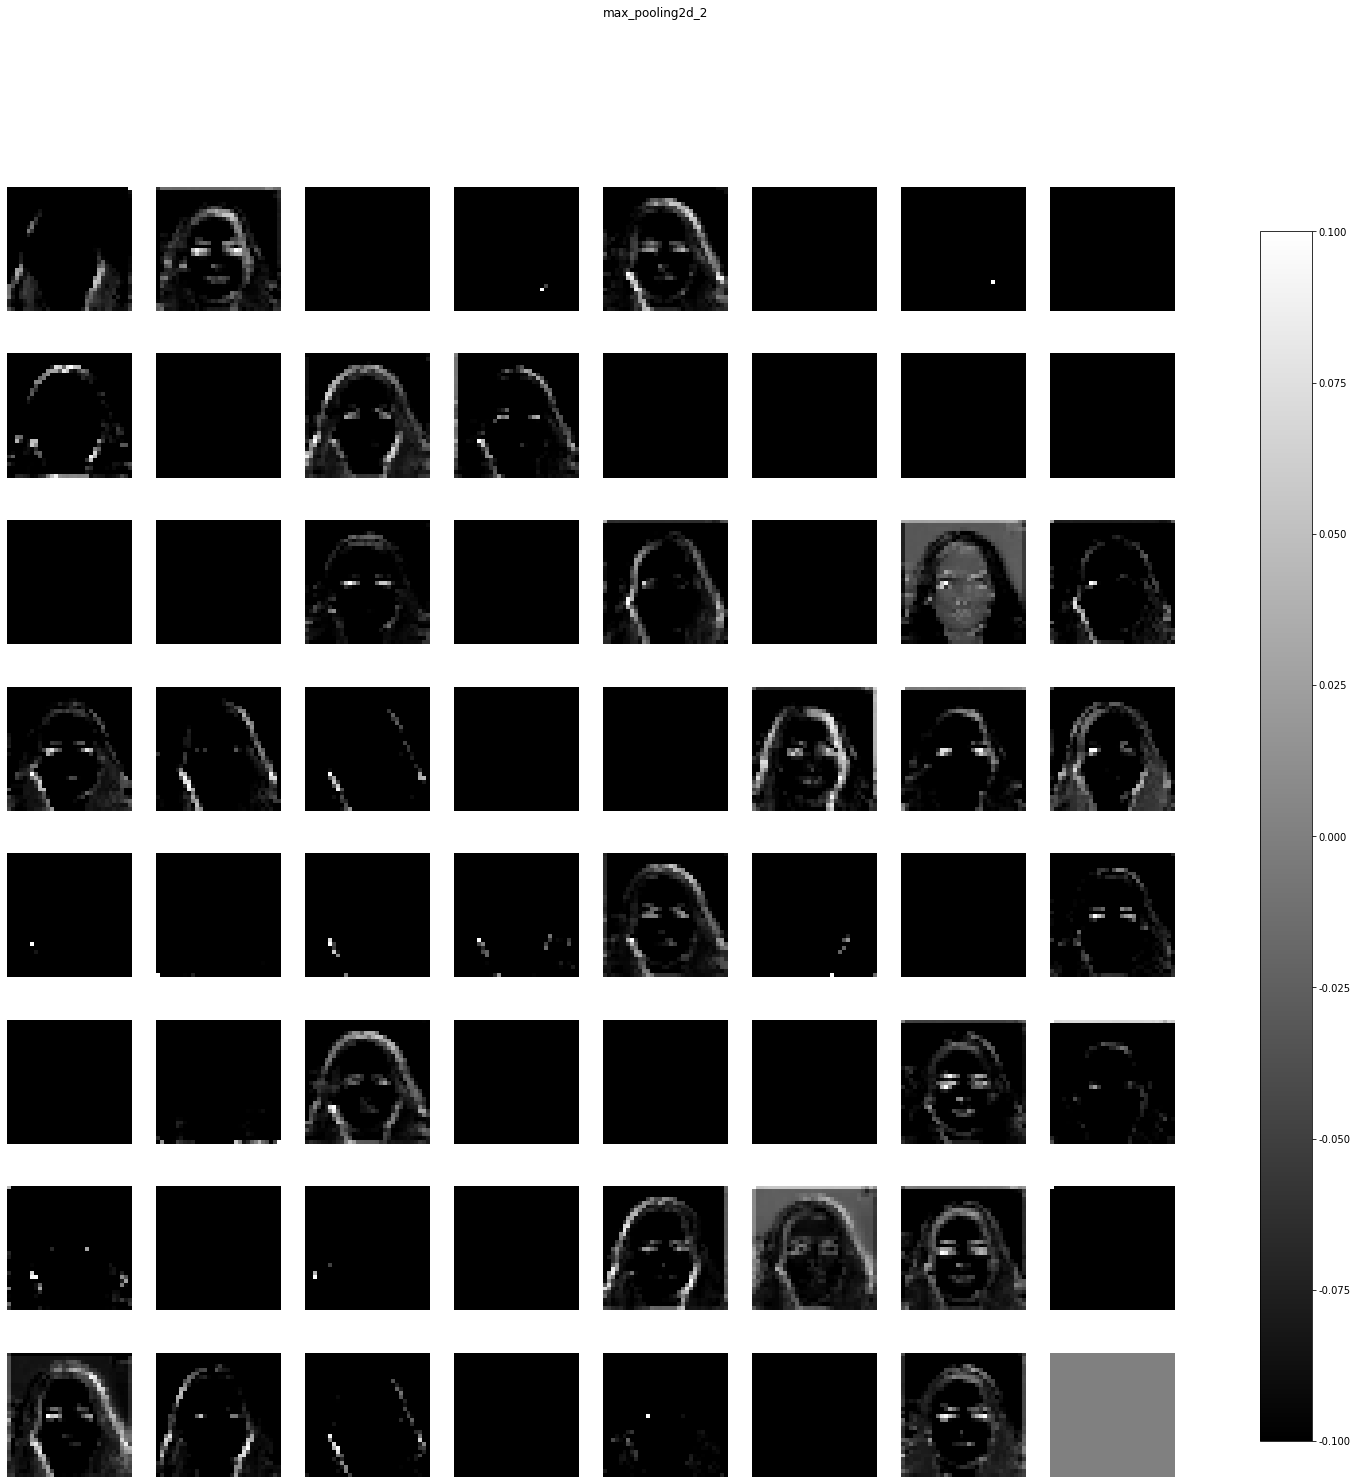

dropout (1, 32, 32, 64) 


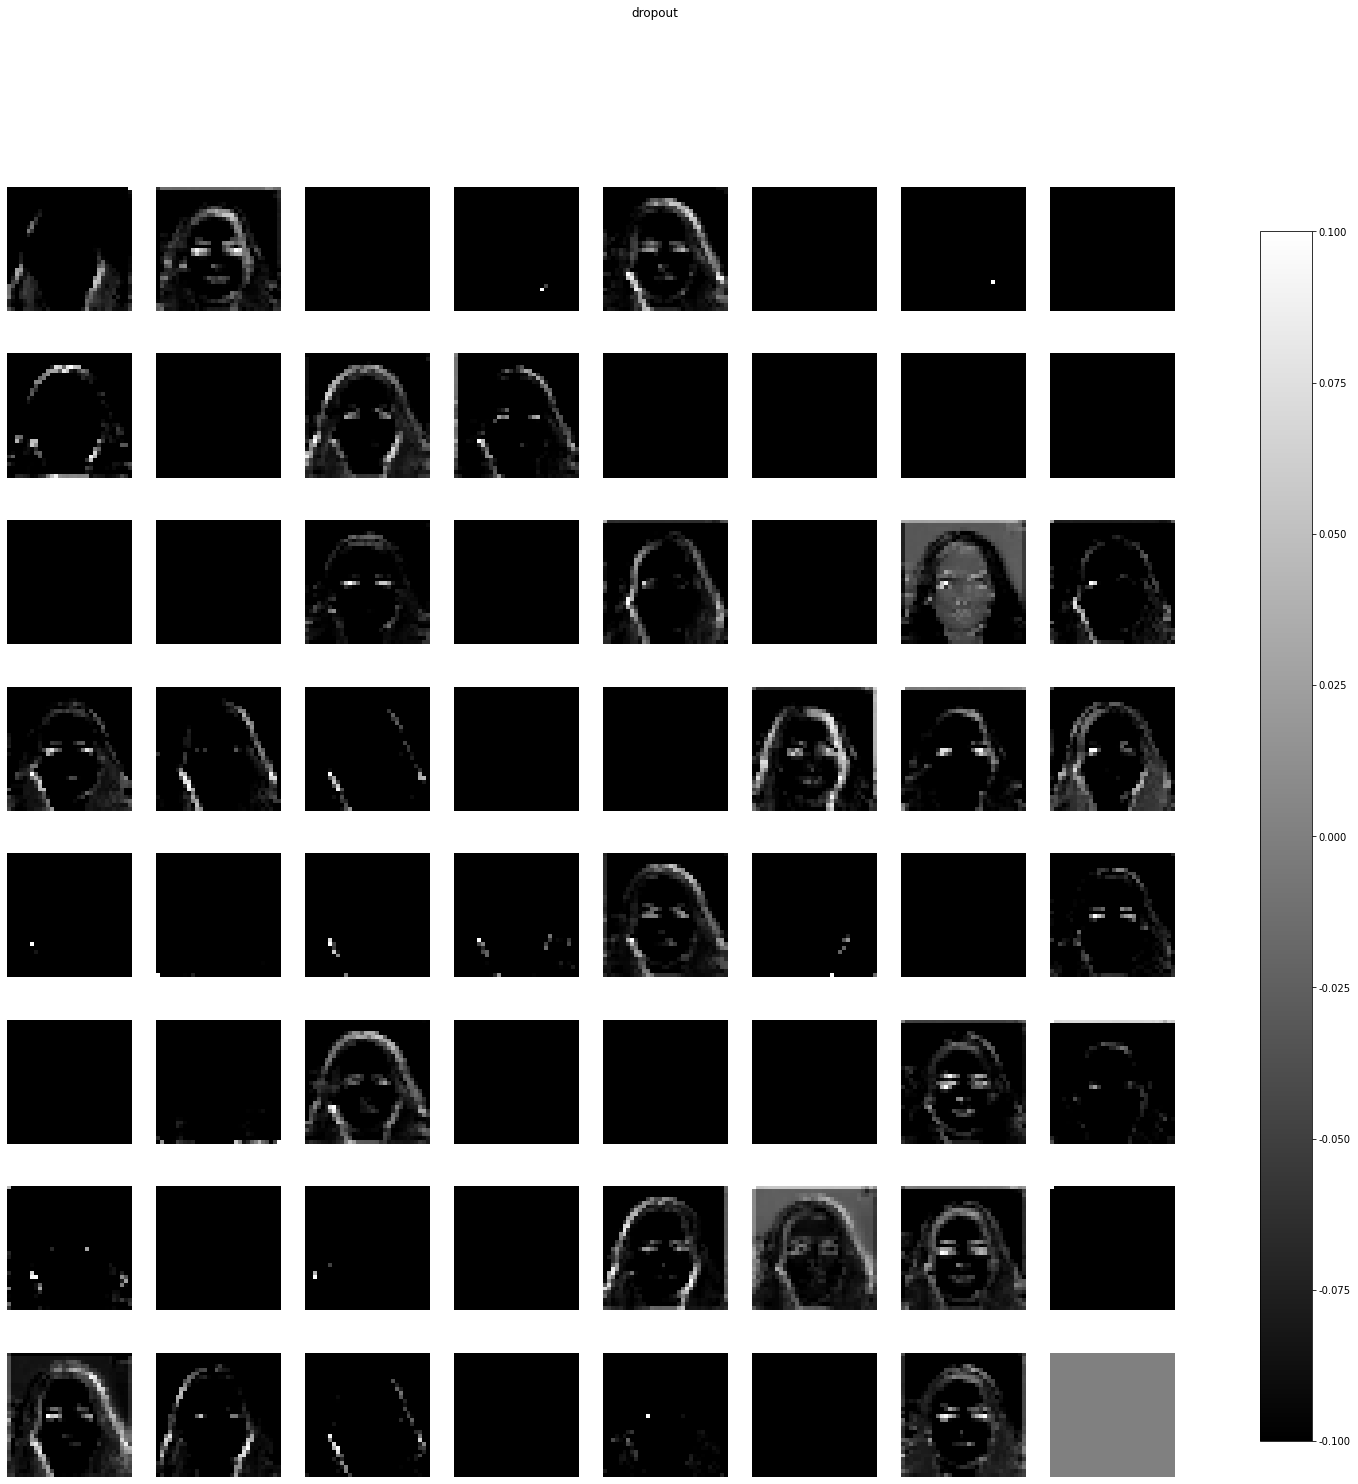

flatten (1, 65536) 


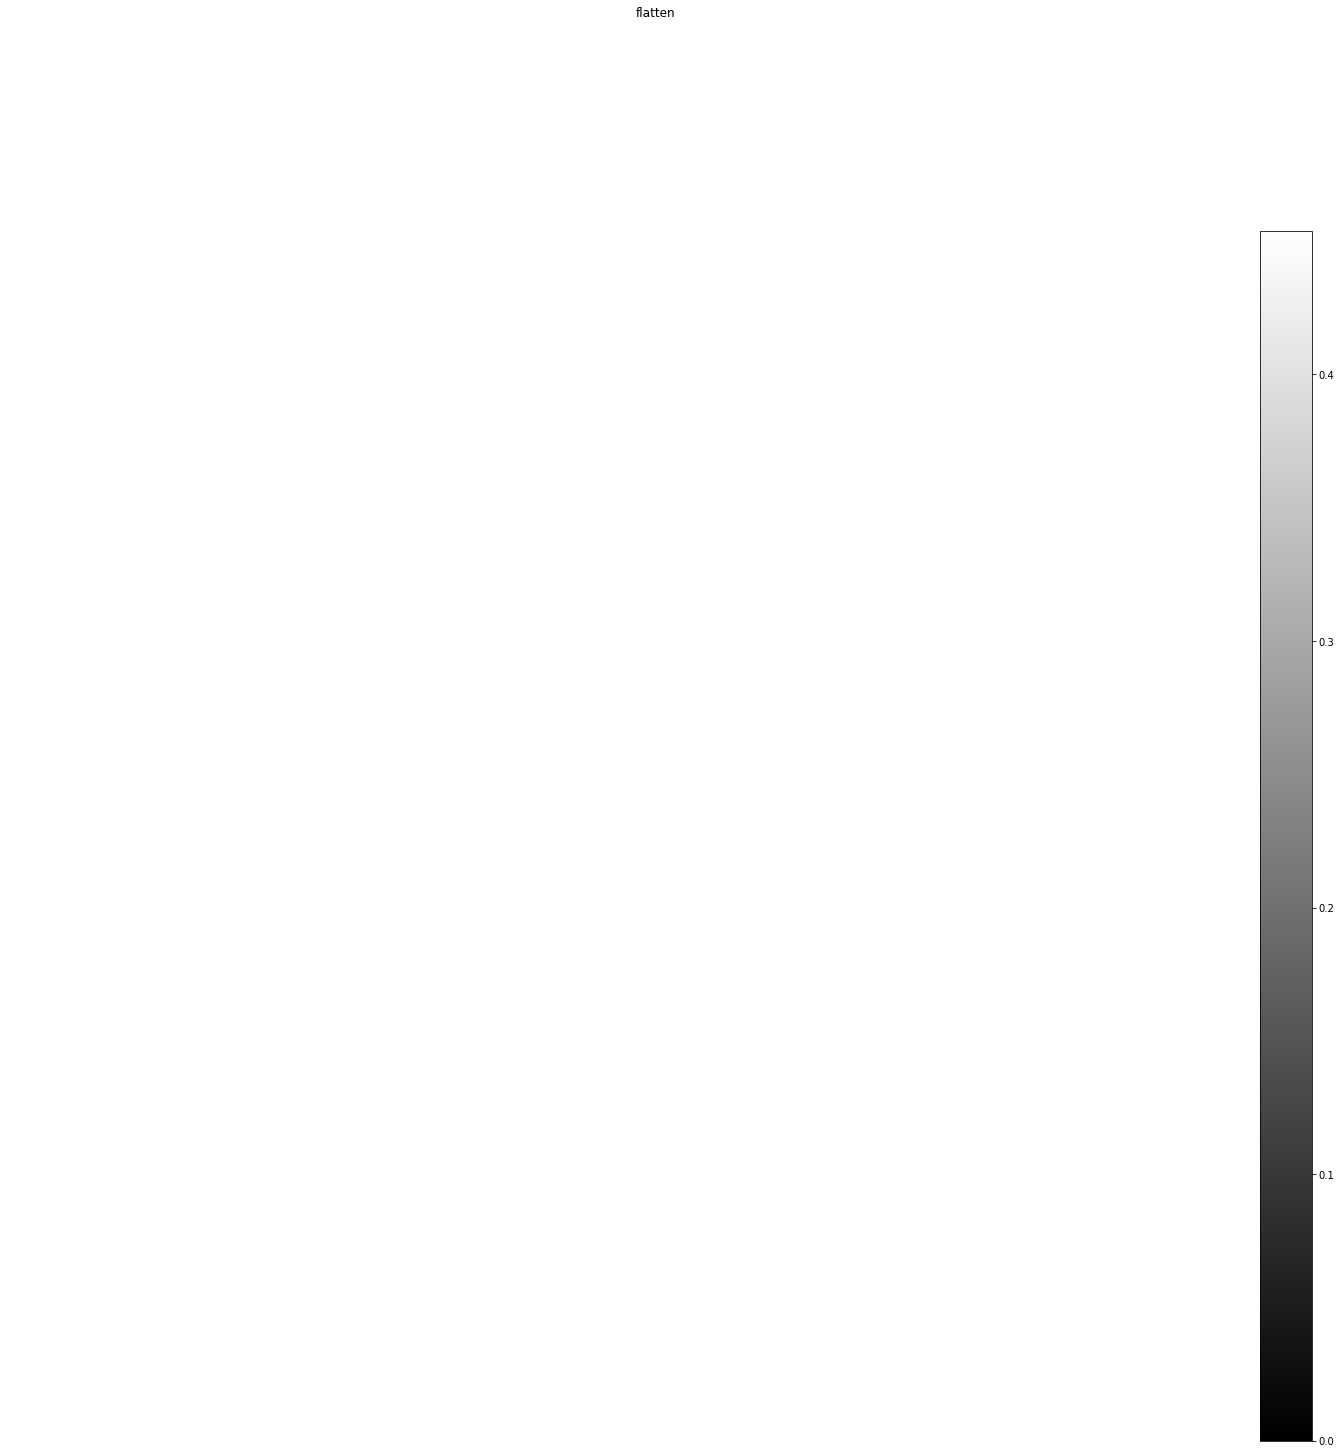

dense (1, 2048) 


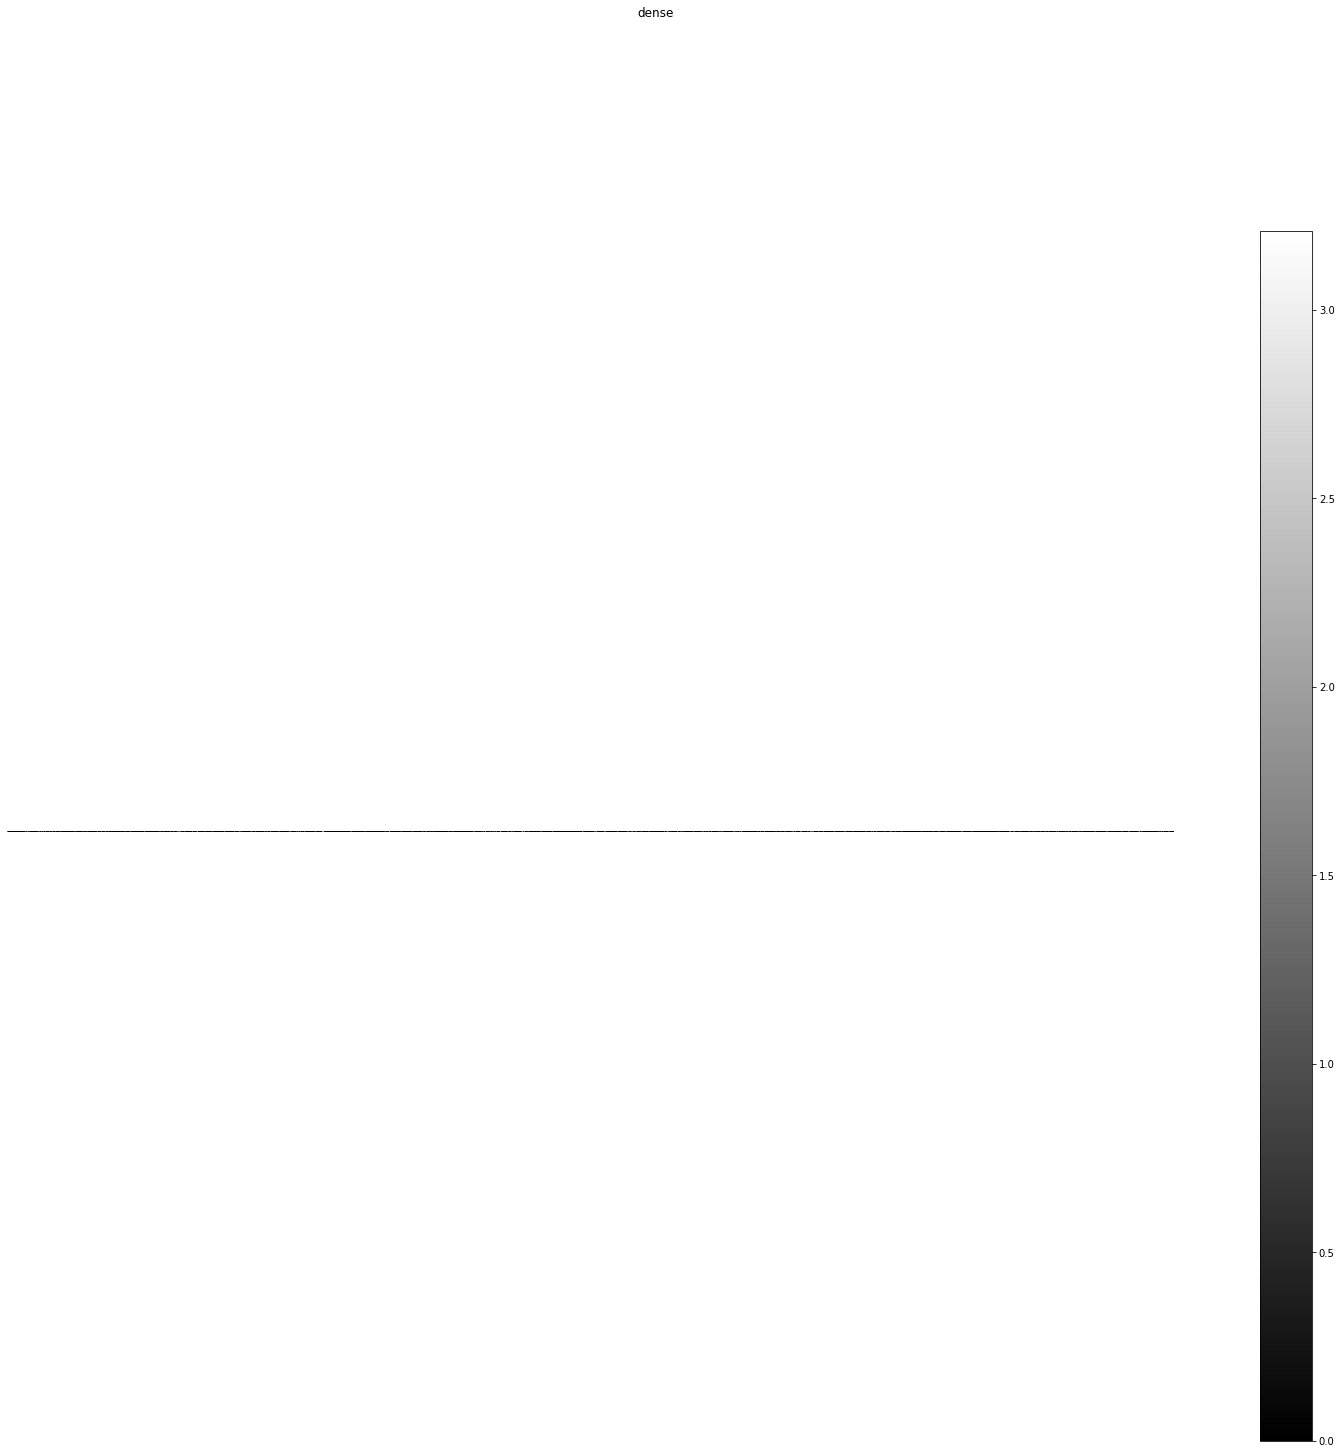

dense_1 (1, 2) 


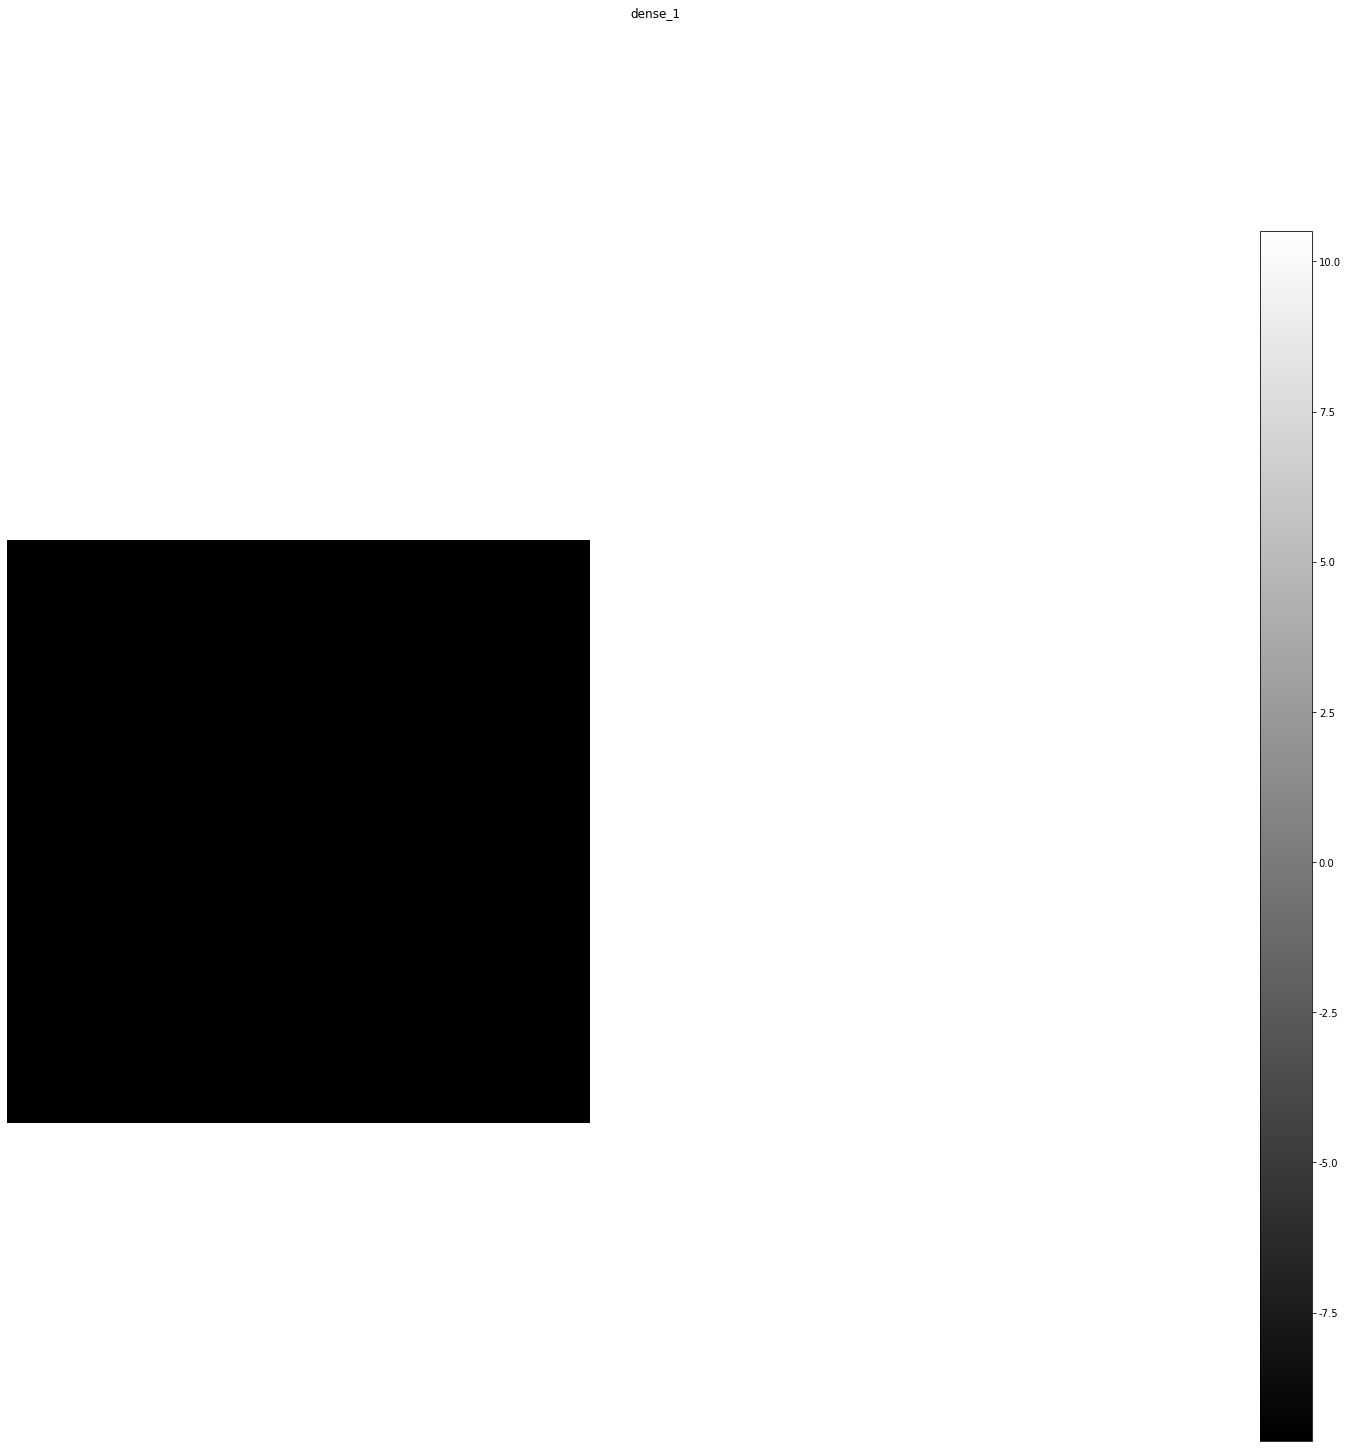

In [108]:
from keract import get_activations, display_activations

for image_batch, labels_batch in train_ds:
    keract_inputs=image_batch[2:3]
    break
print(keract_inputs.shape)
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=True, directory='./')
display_activations(activations, cmap="gray", save=False, directory='./')

### 4.2.4 CNN训练模型保存

In [22]:
model.save('./my_model.h5')

### 4.2.5 CNN模型的混淆矩阵和准确率

In [ ]:
cnn_output = model.predict(test_data)
cnn_output = np.argmax(cnn_output, axis=1)

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       113
         1.0       0.81      0.91      0.85        87

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200



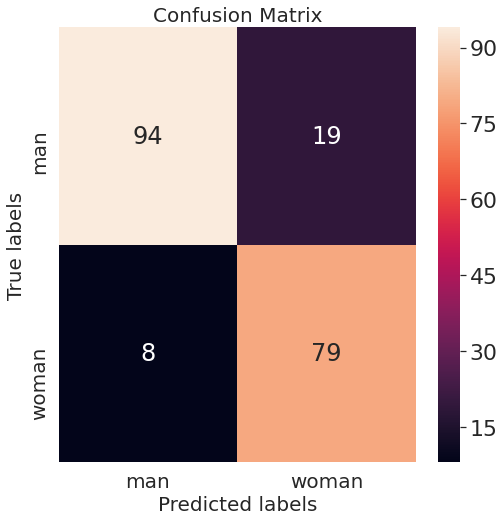

In [214]:
conf_matrix_cnn = confusion_matrix(test_labels, cnn_output)
plt.figure(figsize=(8,8))
ax=plt.subplot()
sns.set(font_scale=2)
sns.heatmap(conf_matrix_cnn, annot=True)
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['man', 'woman'], fontsize=20)
ax.yaxis.set_ticklabels(['man', 'woman'] , fontsize=20)
print(classification_report(test_labels,cnn_output))

### 4.2.6 特征提取
从刚才CNN模型中提取一个模型，该模型输入同CNN模型，输出取softmax层之前的输出，并对训练集和测试集提取特征

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

In [101]:
from keras.models import Model
feature_vectors_model = Model(model.input, model.get_layer('dense').output)
dtc_train_features = feature_vectors_model.predict(train_data_scale)  
print(dtc_train_features.shape)
dtc_test_features =  feature_vectors_model.predict(test_data_scale)
print(dtc_test_features.shape)

(800, 2048)
(200, 2048)


### 4.2.7 CNN提取的特征送到决策树
把CNN倒数第二个全连接层得到的2048维向量送到决策树中进行拟合

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc_cnn = DecisionTreeClassifier(criterion = 'gini')
dtc_cnn.fit(dtc_train_features, train_labels)

DecisionTreeClassifier()

In [ ]:
y_pred_cnn = dtc_cnn.predict(dtc_test_features)

In [217]:
cnn_dtc_score = dtc_cnn.score(dtc_test_features, test_labels)

              precision    recall  f1-score   support

         0.0       0.73      0.64      0.68       113
         1.0       0.60      0.70      0.65        87

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.68      0.67      0.67       200



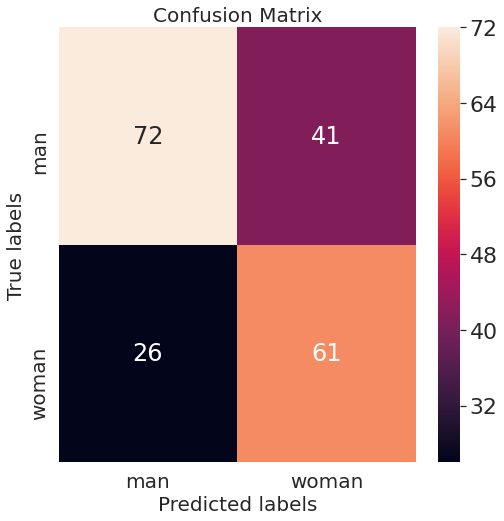

In [215]:
conf_matrix1 = confusion_matrix(test_labels, y_pred_cnn)
plt.figure(figsize=(8,8))
ax=plt.subplot()
sns.set(font_scale=2)
sns.heatmap(conf_matrix1, annot=True)
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['man', 'woman'], fontsize=20)
ax.yaxis.set_ticklabels(['man', 'woman'] , fontsize=20)
print(classification_report(test_labels,y_pred_cnn))

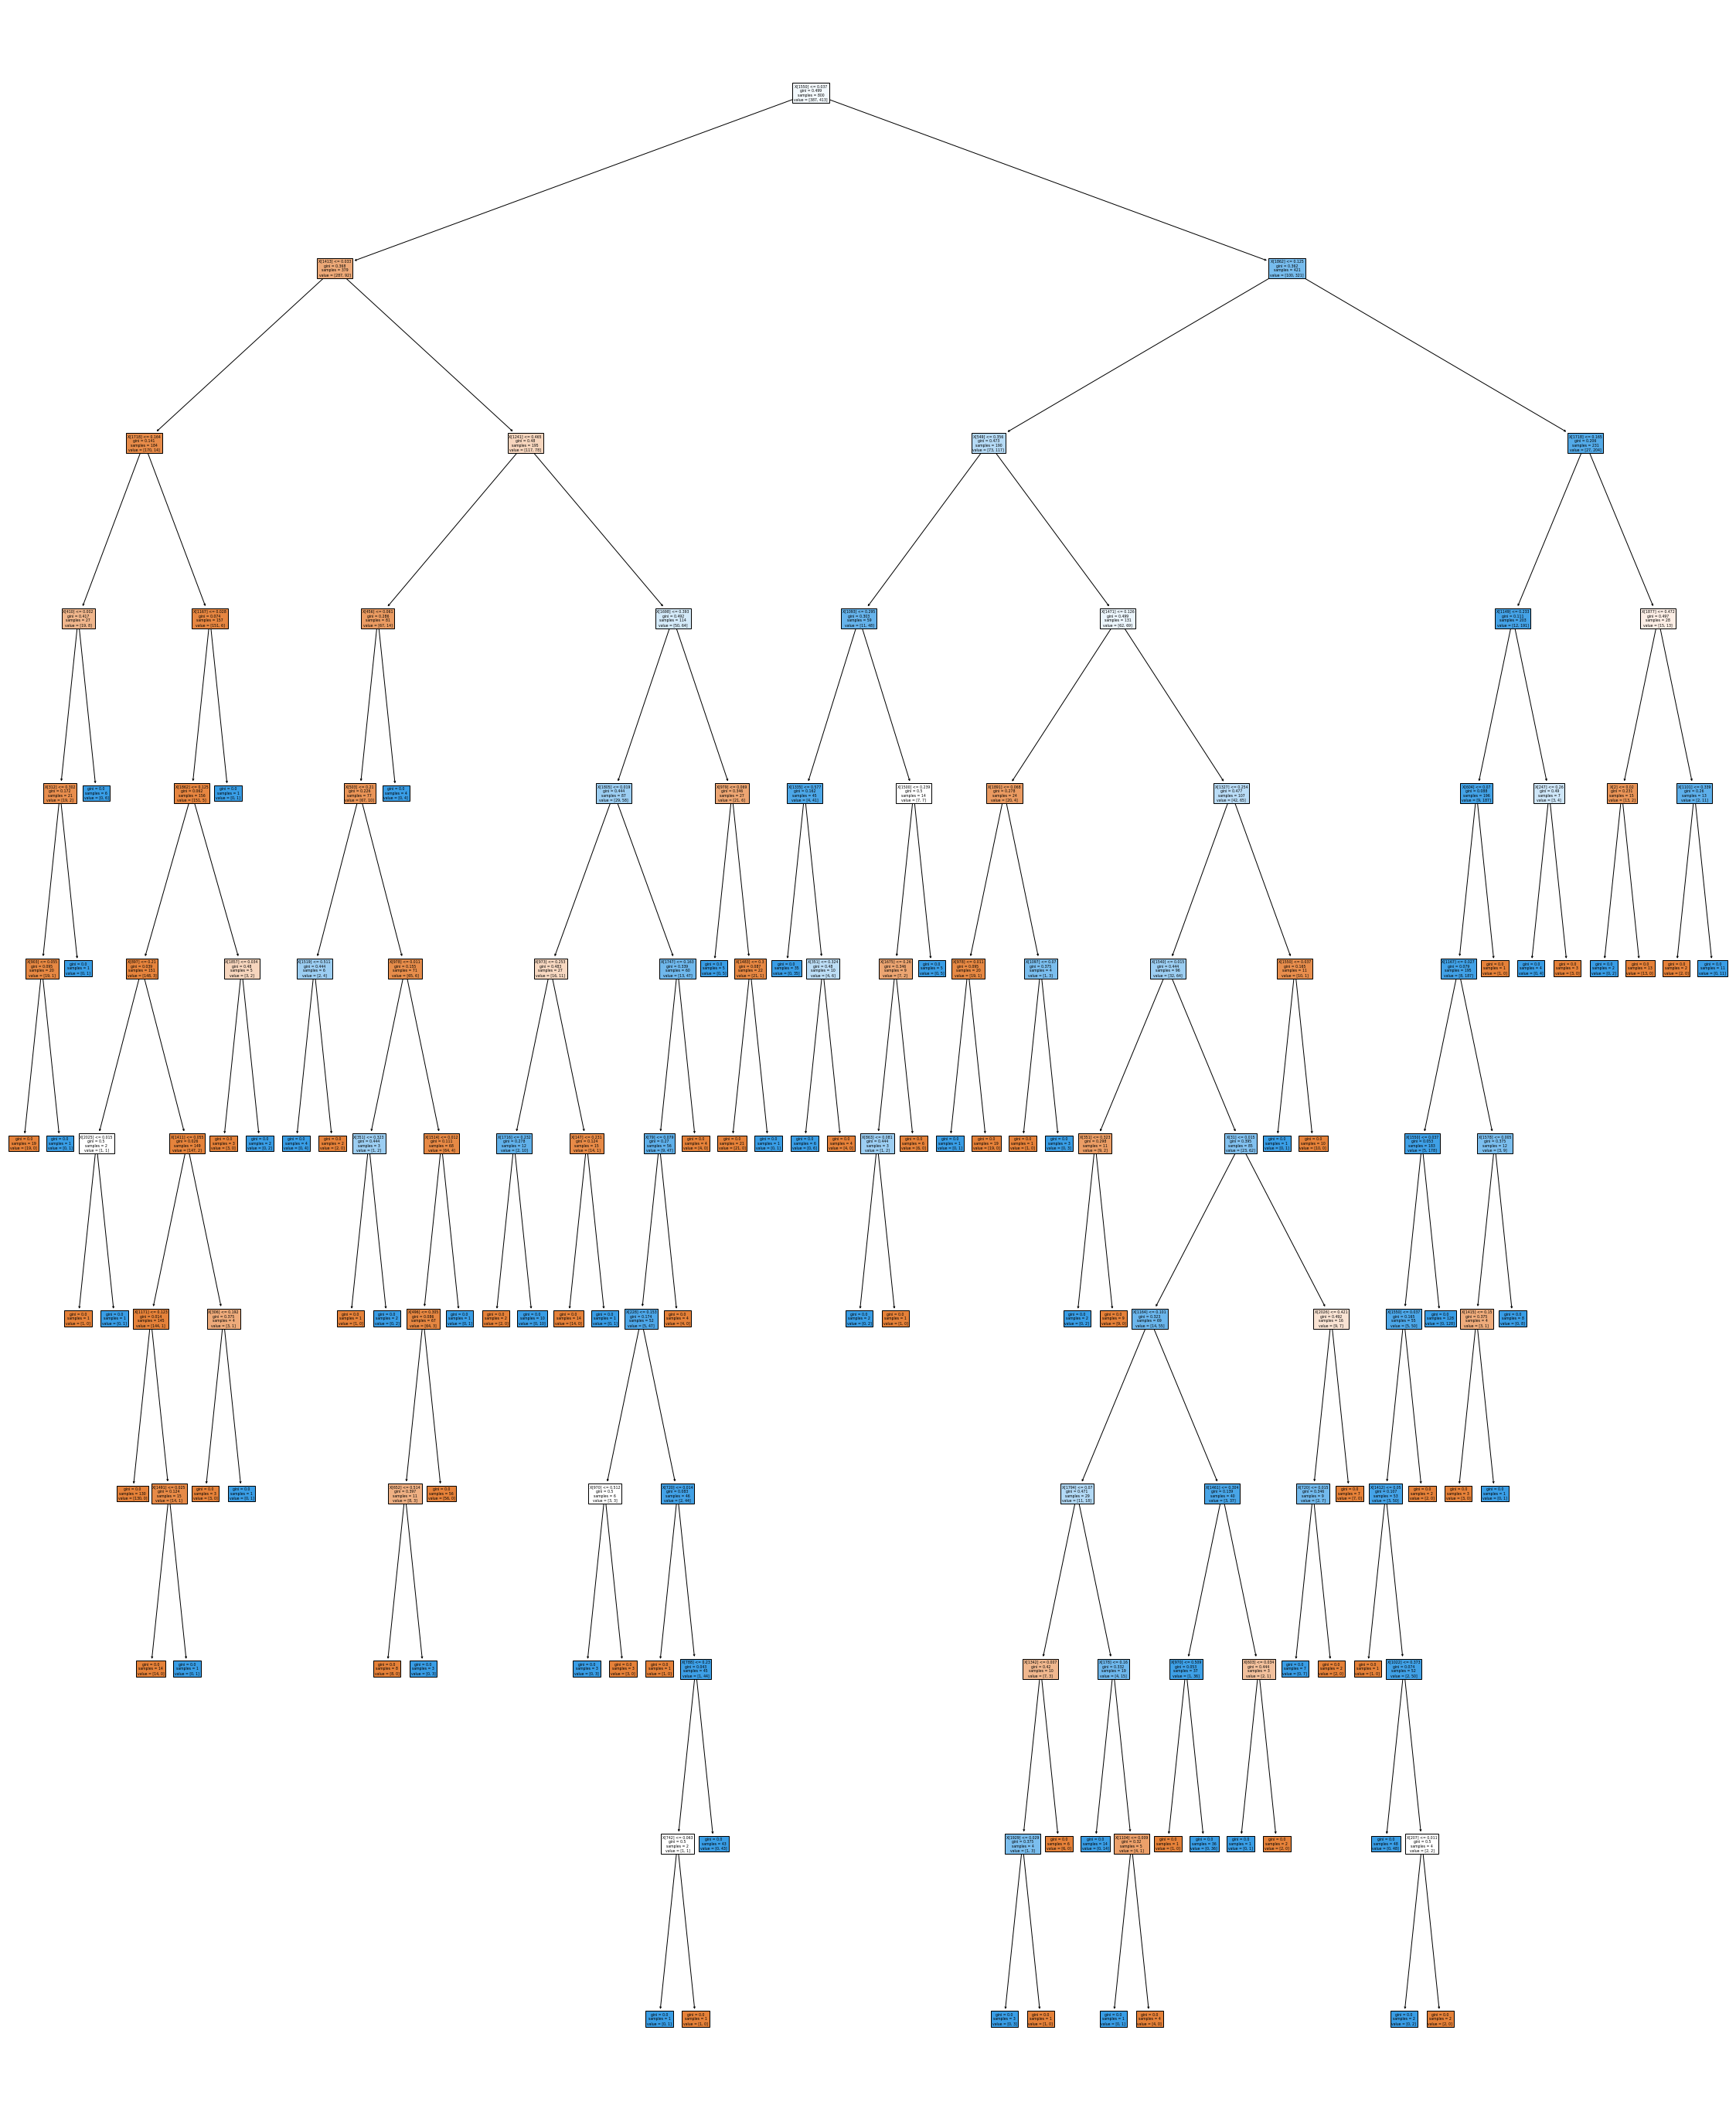

In [111]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,50))
plot_tree(dtc_cnn,filled=True)
plt.savefig('./CNN+Decision tree.png')
plt.show()

## 4.3 CNN提取特征 + 决策树分类(1024个特征)

In [241]:
model_1024 = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Resizing(height=256, width=256, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(num_classes)
])
model_1024.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

In [242]:
import matplotlib as mpl
class LossHistory_1024(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_accuracy'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        mpl.rcParams.update(mpl.rcParamsDefault)
        plt.figure(figsize=(4, 4), dpi=100)
        
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right") 
        plt.show()

Epoch 1/20
7/7 [==============================] - 1s 103ms/step - loss: 3.1707 - accuracy: 0.4888 - val_loss: 0.8223 - val_accuracy: 0.4350
Epoch 2/20
7/7 [==============================] - 1s 89ms/step - loss: 0.6942 - accuracy: 0.5175 - val_loss: 0.6755 - val_accuracy: 0.5650
Epoch 3/20
7/7 [==============================] - 1s 84ms/step - loss: 0.6704 - accuracy: 0.5763 - val_loss: 0.6014 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 1s 88ms/step - loss: 0.5802 - accuracy: 0.7100 - val_loss: 0.5696 - val_accuracy: 0.7200
Epoch 5/20
7/7 [==============================] - 1s 95ms/step - loss: 0.5003 - accuracy: 0.7513 - val_loss: 0.4520 - val_accuracy: 0.7850
Epoch 6/20
7/7 [==============================] - 1s 85ms/step - loss: 0.4165 - accuracy: 0.8263 - val_loss: 0.4353 - val_accuracy: 0.8100
Epoch 7/20
7/7 [==============================] - 1s 85ms/step - loss: 0.3004 - accuracy: 0.8737 - val_loss: 0.3591 - val_accuracy: 0.8400
Epoch 8/20
7/7 [==========

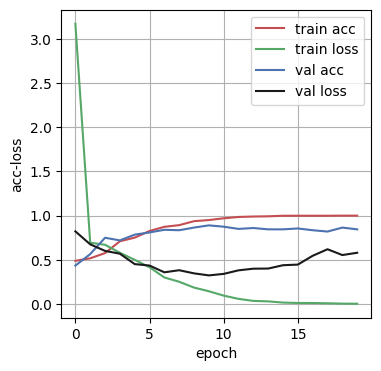

In [243]:
history_1024 = LossHistory_1024()
earlyStopCb_1024 = EarlyStopping(monitor='val_accuracy', restore_best_weights=False, patience=10)
cnn_history_1024 = model_1024.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks=[history_1024, earlyStopCb_1024])
history_1024.loss_plot('epoch')

In [244]:
model_1024.save('./my_model_1024.h5')

In [245]:
model_1024.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_4 (Resizing)        (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)       

In [246]:
from keras.models import Model
feature_vectors_model_1024 = Model(model_1024.input, model_1024.get_layer('dense_8').output)
dtc_train_features_1024 = feature_vectors_model_1024.predict(train_data_scale)  
print(dtc_train_features_1024.shape)
dtc_test_features_1024 =  feature_vectors_model_1024.predict(test_data_scale)
print(dtc_test_features_1024.shape)

(800, 1024)
(200, 1024)


              precision    recall  f1-score   support

         0.0       0.76      0.60      0.67       113
         1.0       0.59      0.76      0.67        87

    accuracy                           0.67       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.69      0.67      0.67       200



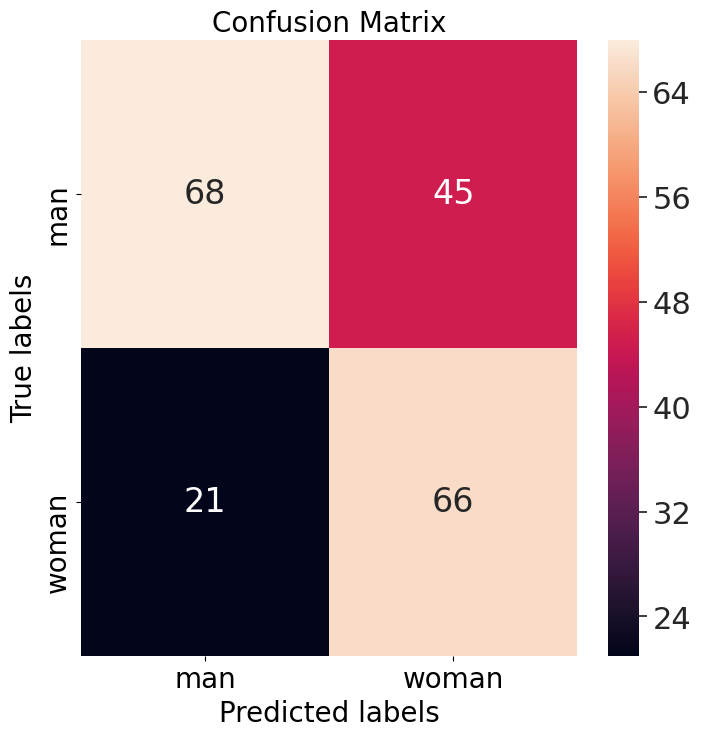

In [247]:
from sklearn.tree import DecisionTreeClassifier
dtc_cnn_1024 = DecisionTreeClassifier(criterion = 'gini')
dtc_cnn_1024.fit(dtc_train_features_1024, train_labels)
y_pred_cnn_1024 = dtc_cnn_1024.predict(dtc_test_features_1024)
cnn_dtc_score_1024 = dtc_cnn_1024.score(dtc_test_features_1024, test_labels)
conf_matrix1_1024 = confusion_matrix(test_labels, y_pred_cnn_1024)
plt.figure(figsize=(8,8))
ax=plt.subplot()
sns.set(font_scale=2)
sns.heatmap(conf_matrix1_1024, annot=True)
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['man', 'woman'], fontsize=20)
ax.yaxis.set_ticklabels(['man', 'woman'] , fontsize=20)
print(classification_report(test_labels,y_pred_cnn_1024))

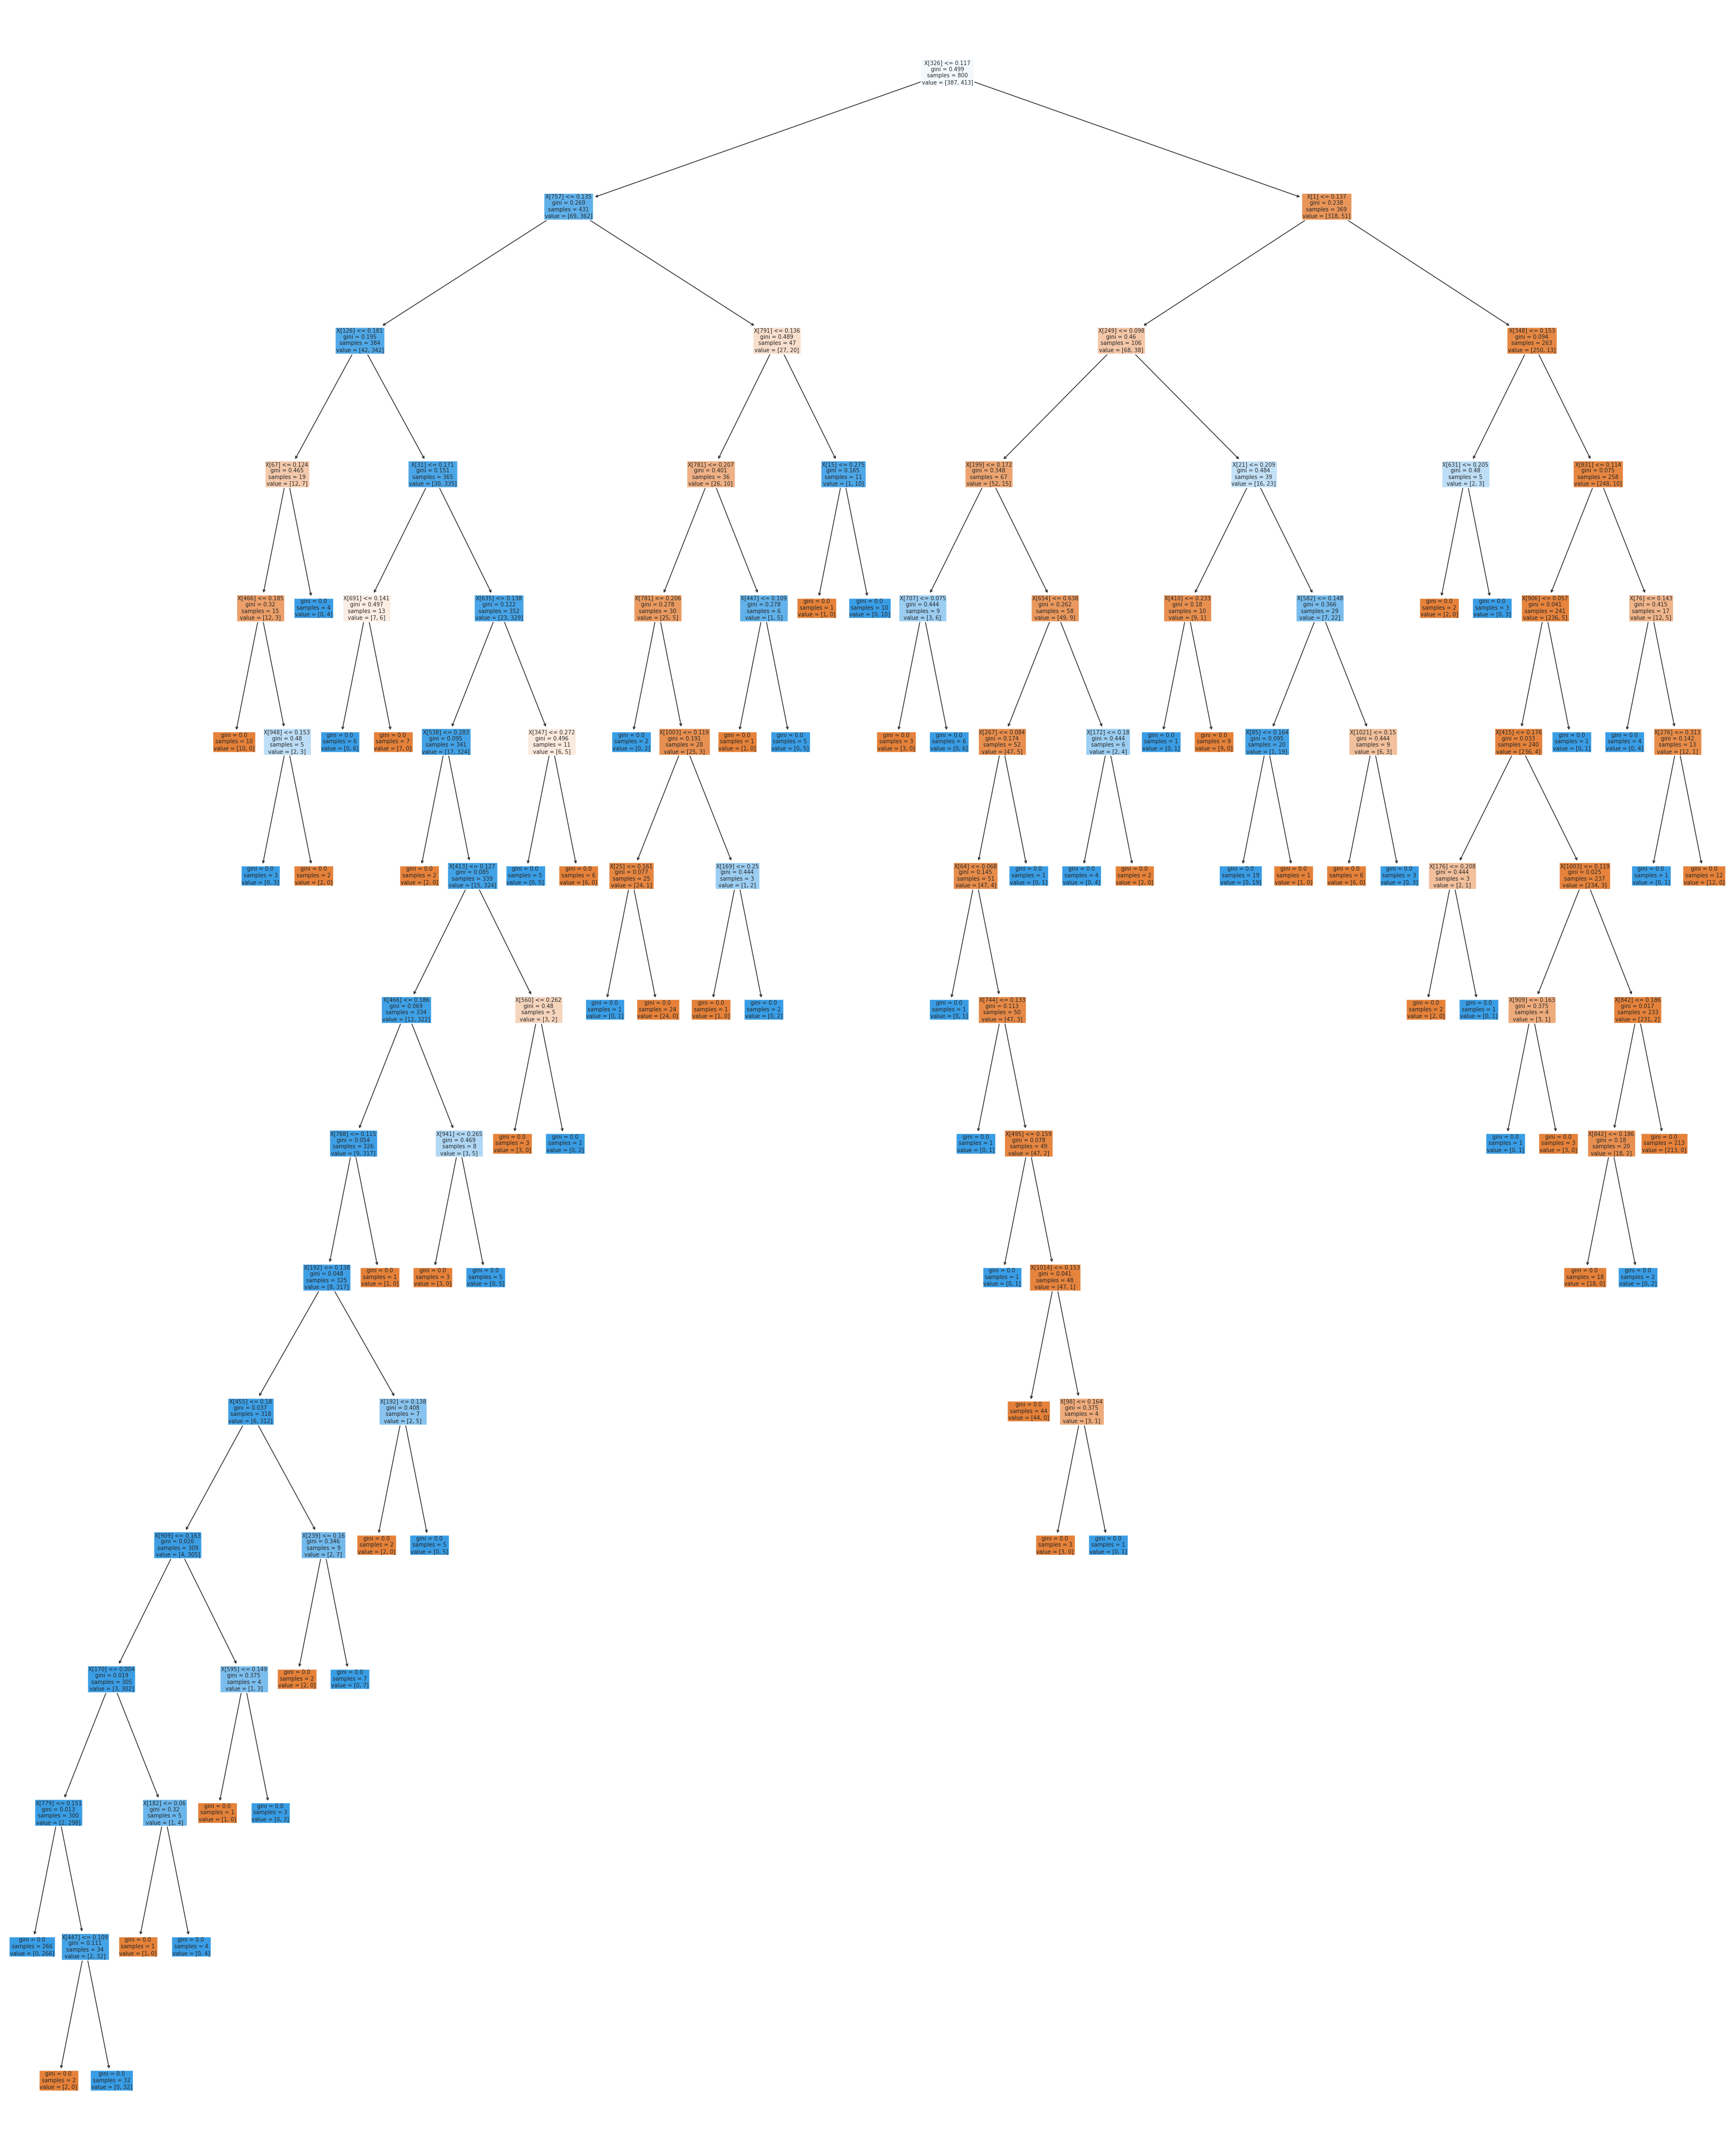

In [250]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,50))
plot_tree(dtc_cnn_1024,filled=True)
plt.savefig('./CNN+Decision tree(1024).png')
plt.show()

## 4.4 朴素贝叶斯

In [252]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_data_scale_dtc, train_labels)
y_pred_bayes = nb.predict(test_data_scale_dtc)
bayes_score = nb.score(test_data_scale_dtc, test_labels)
bayes_score

0.72

# 五、不同方法准确率比较

In [257]:
names = ["Naive bayes(pixel feature)","dtc_gini(pixel feature)", "dtc_entropy(pixel feature)", "cnn", "cnn+dtc(2048feature)", "cnn+dtc(1024feature)"]
accuracies = [bayes_score, dtc_gini_score, dtc_entropy_score, 0.865, cnn_dtc_score, cnn_dtc_score_1024]
print(accuracies)
es = {names[i]: accuracies[i] for i in range(len(names))}
normal_accuracies = pd.DataFrame(es, index=['Val Accuracy'])
normal_accuracies.T

[0.72, 0.7, 0.775, 0.865, 0.665, 0.67]


Val Accuracy
Naive bayes(pixel feature)         0.720
dtc_gini(pixel feature)            0.700
dtc_entropy(pixel feature)         0.775
cnn                                0.865
cnn+dtc(2048feature)               0.665
cnn+dtc(1024feature)               0.670